# Chaîne de traitement _data science_.
## _Data wrangling_ avec `python` ([`scipy`](https://www.scipy.org/), [`scikit-learn`](https://scikit-learn.org/)) 


|Auteur|Centre|Modification|
|---|---|---|
|H. Delalin|Arras|2021/02/02|
|P. Halftermeyer|Orléans|2018/11/17|

<img src="./media/CESI.png" alt="CESI logo" width="450" height="400"/>

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre

random=default_rng(42)
# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Nous allons commencer par l'import des fichiers CSV afin de pouvoir travailler avec les différents jeux de données fournis

In [2]:
import os
import tarfile
import urllib.request
from pathlib import Path
import pathlib
print(pathlib.Path().resolve(), "Mettre tout les fichiers clonés dans ce repertoire.")

# General data
general_data = pd.read_csv('general_data.csv',dtype={'EmployeeID': object})
# survey data 
manager_survey_data = pd.read_csv('manager_survey_data.csv',dtype={'EmployeeID': object})
employee_survey_data = pd.read_csv('employee_survey_data.csv',dtype={'EmployeeID': object})
# office entry/exit time
in_time = pd.read_csv('in_time.csv',dtype={'EmployeeID': object})
out_time = pd.read_csv('out_time.csv',dtype={'EmployeeID': object})

#print(general_data.describe())


C:\Users\lyder\Desktop\CESI\FISE A4 INFO\BLOC AI\Projet\blocAI Mettre tout les fichiers clonés dans ce repertoire.


Nous procédons à une simple vérification des données afin de voir ce avec quoi nous travaillons.

In [3]:
print("general_data:", general_data.shape)
print("employee_survey:", employee_survey_data.shape)
print("manager_survey:", manager_survey_data.shape)

general_data: (4410, 24)
employee_survey: (4410, 4)
manager_survey: (4410, 3)


In [4]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [6]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Création d'un index avec d'avoir les données correspondantes à chaque personne même si les données sont éclatées en plusieurs fichiers.

In [7]:
general_data.set_index('EmployeeID',inplace=True)
employee_survey_data.set_index('EmployeeID',inplace=True)
manager_survey_data.set_index('EmployeeID',inplace=True)

Combinaison des 3 fichiers CSV pour une meilleure corrélation

In [8]:
Employee = pd.concat([general_data, employee_survey_data, manager_survey_data],axis =1)
Employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


Nous procédons ensuite à une vérification des données. Ci-dessous nous vérifions s'il y a des colonnes qui ne contiennent que la même valeur ( valeur unique) afin de l'écarter de l'étude si jamais nous l'utilisons, car elle n'apporterait rien du tout dans l'étude.

In [9]:
Employee.T.apply(lambda columns: columns.nunique(),axis=1)

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
dtype: int64

Nous voyons qu'il y a certaines colonnes (StandardHours, Over18, EmployeeCount) qui ne contiennent que 1 valeur ( valeur unique). Nous décidons donc de les supprimer.

In [10]:
Employee.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

Après cela, interessons nous aux types de données que nous avons.
Comme il serait compliqué de travailler simultanément avec des données quantitatives ET qualitatives,
nous allons nous occuper de rendre toutes les données qualitatives en données quantitatives. Ce qui signifie dans notre cas,
passer d'une donnée de type "object" à une donnée de type "float" ou "int".

Dans le même temps, nous allons vérifier si nos colonnes contiennent des valeurs manquantes.

In [11]:
Employee.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [12]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel         4410

In [13]:
nullcount = Employee.isnull().sum()
nullcheck = nullcount[nullcount >0]

print('Colonnes qui contiennent des valeurs manquantes: ' + '\n')
if nullcheck.empty == False:
    print(nullcheck)
else:
    print('*Nettoyage terminé, plus de valeurs manquantes*')

Colonnes qui contiennent des valeurs manquantes: 

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


Nous pouvons voir qu'en effet, certaines colonnes contiennent des valeurs manquantes.
Nous allons devoir nous occuper de cela.

In [14]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel         4410

Changement de type de données pour les données de type "object".

In [15]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_X = LabelEncoder()

Employee['BusinessTravel'] = labelEncoder_X.fit_transform(Employee['BusinessTravel'])
Employee['Department'] = labelEncoder_X.fit_transform(Employee['Department'])
Employee['EducationField'] = labelEncoder_X.fit_transform(Employee['EducationField'])
Employee['Gender'] = labelEncoder_X.fit_transform(Employee['Gender'])
Employee['JobRole'] = labelEncoder_X.fit_transform(Employee['JobRole'])
Employee['MaritalStatus'] = labelEncoder_X.fit_transform(Employee['MaritalStatus'])
Employee['Attrition'] = labelEncoder_X.fit_transform(Employee['Attrition'])


In [16]:
Employee.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
Gender                       int32
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

Nos valeurs ont bien été changées en donnée quantitatives.

Vérifions maintenant des colonnes contiennent des valeurs nulles qui pourraient fausser notre étude.

In [17]:
Employee.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
JobInvolvement             False
PerformanceRating          False
dtype: bool


Comme nous le voyons ci-dessus, en effet, certaines colonnes contiennent des valeurs nulles, que nous devons remplacer.
Nous utiliserons la fonction mean plutôt que median, car nous ne pensons pas qu'il y ait de données aberrantes, auquel cas nous utiliserions le median pour éviter toute contamination de données aberrante qui fausserait notre étude, tandis que le médian est plus sûr.

In [18]:
meanOfNumCompaniesWorked = Employee["NumCompaniesWorked"].astype('float').mean(axis = 0 )
Employee["NumCompaniesWorked"].replace(np.nan,meanOfNumCompaniesWorked,inplace = True)

meanOfTotalWorkingYears = Employee["TotalWorkingYears"].astype('float').mean(axis = 0 )
Employee["TotalWorkingYears"].replace(np.nan,meanOfTotalWorkingYears,inplace = True)

meanOfEnvironmentSatisfaction = round(Employee["EnvironmentSatisfaction"].astype('float').mean(axis = 0 ))
Employee["EnvironmentSatisfaction"].replace(np.nan,meanOfEnvironmentSatisfaction,inplace = True)

meanOfJobSatisfaction = round(Employee["JobSatisfaction"].astype('float').mean(axis = 0 ))
Employee["JobSatisfaction"].replace(np.nan,meanOfJobSatisfaction,inplace = True)

meanOfWorkLifeBalance = round(Employee["WorkLifeBalance"].astype('float').mean(axis = 0 ))
Employee["WorkLifeBalance"].replace(np.nan,meanOfWorkLifeBalance,inplace = True)

In [19]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel         4410

In [20]:
Employee.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
JobInvolvement             False
PerformanceRating          False
dtype: bool

Nos données semblent propres, plus aucune colonne ne contient de valeur nulle ou manquante, et les types de données sont les bons, nous avons des données quantitatives avec lesquelles il sera plus facile de travailler.

In [21]:
Employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3



Dans notre jeu de données nous voyons qu'il y a des données "in" et "out" qui ont les heures d'arrivée et de départ des employés.
Nous allons donc tâcher de les liées entre elles et selon l'employé, afi d'avoir une donnée utilisable et interessante.

In [22]:
import datetime as dt
print("in_time:", in_time.shape)
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
in_time.set_index('EmployeeID', inplace=True)
in_time.head()

in_time: (4410, 262)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09

In [23]:
print("out_time:",in_time.shape)
out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time.set_index('EmployeeID', inplace=True)
out_time.head()

out_time: (4410, 261)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09

In [24]:

in_time_stamp = in_time.apply(pd.to_datetime) #convertion en timestamp object 
out_time_stamp = out_time.apply(pd.to_datetime)
df_working_hours = (out_time_stamp - in_time_stamp)# Temps passé à l'entreprise
df_working_hours.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,NaT,0 days 07:20:49,0 days 07:16:03,NaT,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,NaT,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,NaT,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,NaT,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,NaT,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:

In [25]:
df_working_time= df_working_hours / np.timedelta64(1, 'h') #convertion temps passé en float

mean_working_hours = df_working_time.mean(axis=1)# moyenne de temps passé dans lentreprise dans la période ci-dessus

Employee['MeanWorkingHours'] = mean_working_hours.values
general_data['MeanWorkingHours'] = mean_working_hours.values #**Ajout dans le dataframe.
print(Employee['MeanWorkingHours'])


EmployeeID
1       7.373651
2       7.718969
3       7.013240
4       7.193678
5       8.006175
          ...   
4406    8.522277
4407    6.092954
4408    7.706632
4409    9.492595
4410    6.988948
Name: MeanWorkingHours, Length: 4410, dtype: float64


In [26]:
import calendar

In [27]:
in_time_stamp.head()
week_day = in_time_stamp.dropna(how='all', axis=1) # On enlève les colonnes qui sont "NotATime" car ce sont les jours fériés
week_day.head()
col_list =list( week_day.columns)
df_col_list = pd.DataFrame(col_list)
df_col_list_stamp = df_col_list.apply(pd.to_datetime)
df_col_list_stamp[0] = df_col_list_stamp[0].dt.weekday 
weekday_list=list(df_col_list_stamp[0])
week_day.columns = [weekday_list]
Employee['TotalLeave']=week_day.isna().sum(axis=1).values
general_data['TotalLeave']=week_day.isna().sum(axis=1).values
Employee['LeaveMonFri']=week_day[[0,4]].isna().sum(axis=1).values
general_data['LeaveMonFri']=week_day[[0,4]].isna().sum(axis=1).values

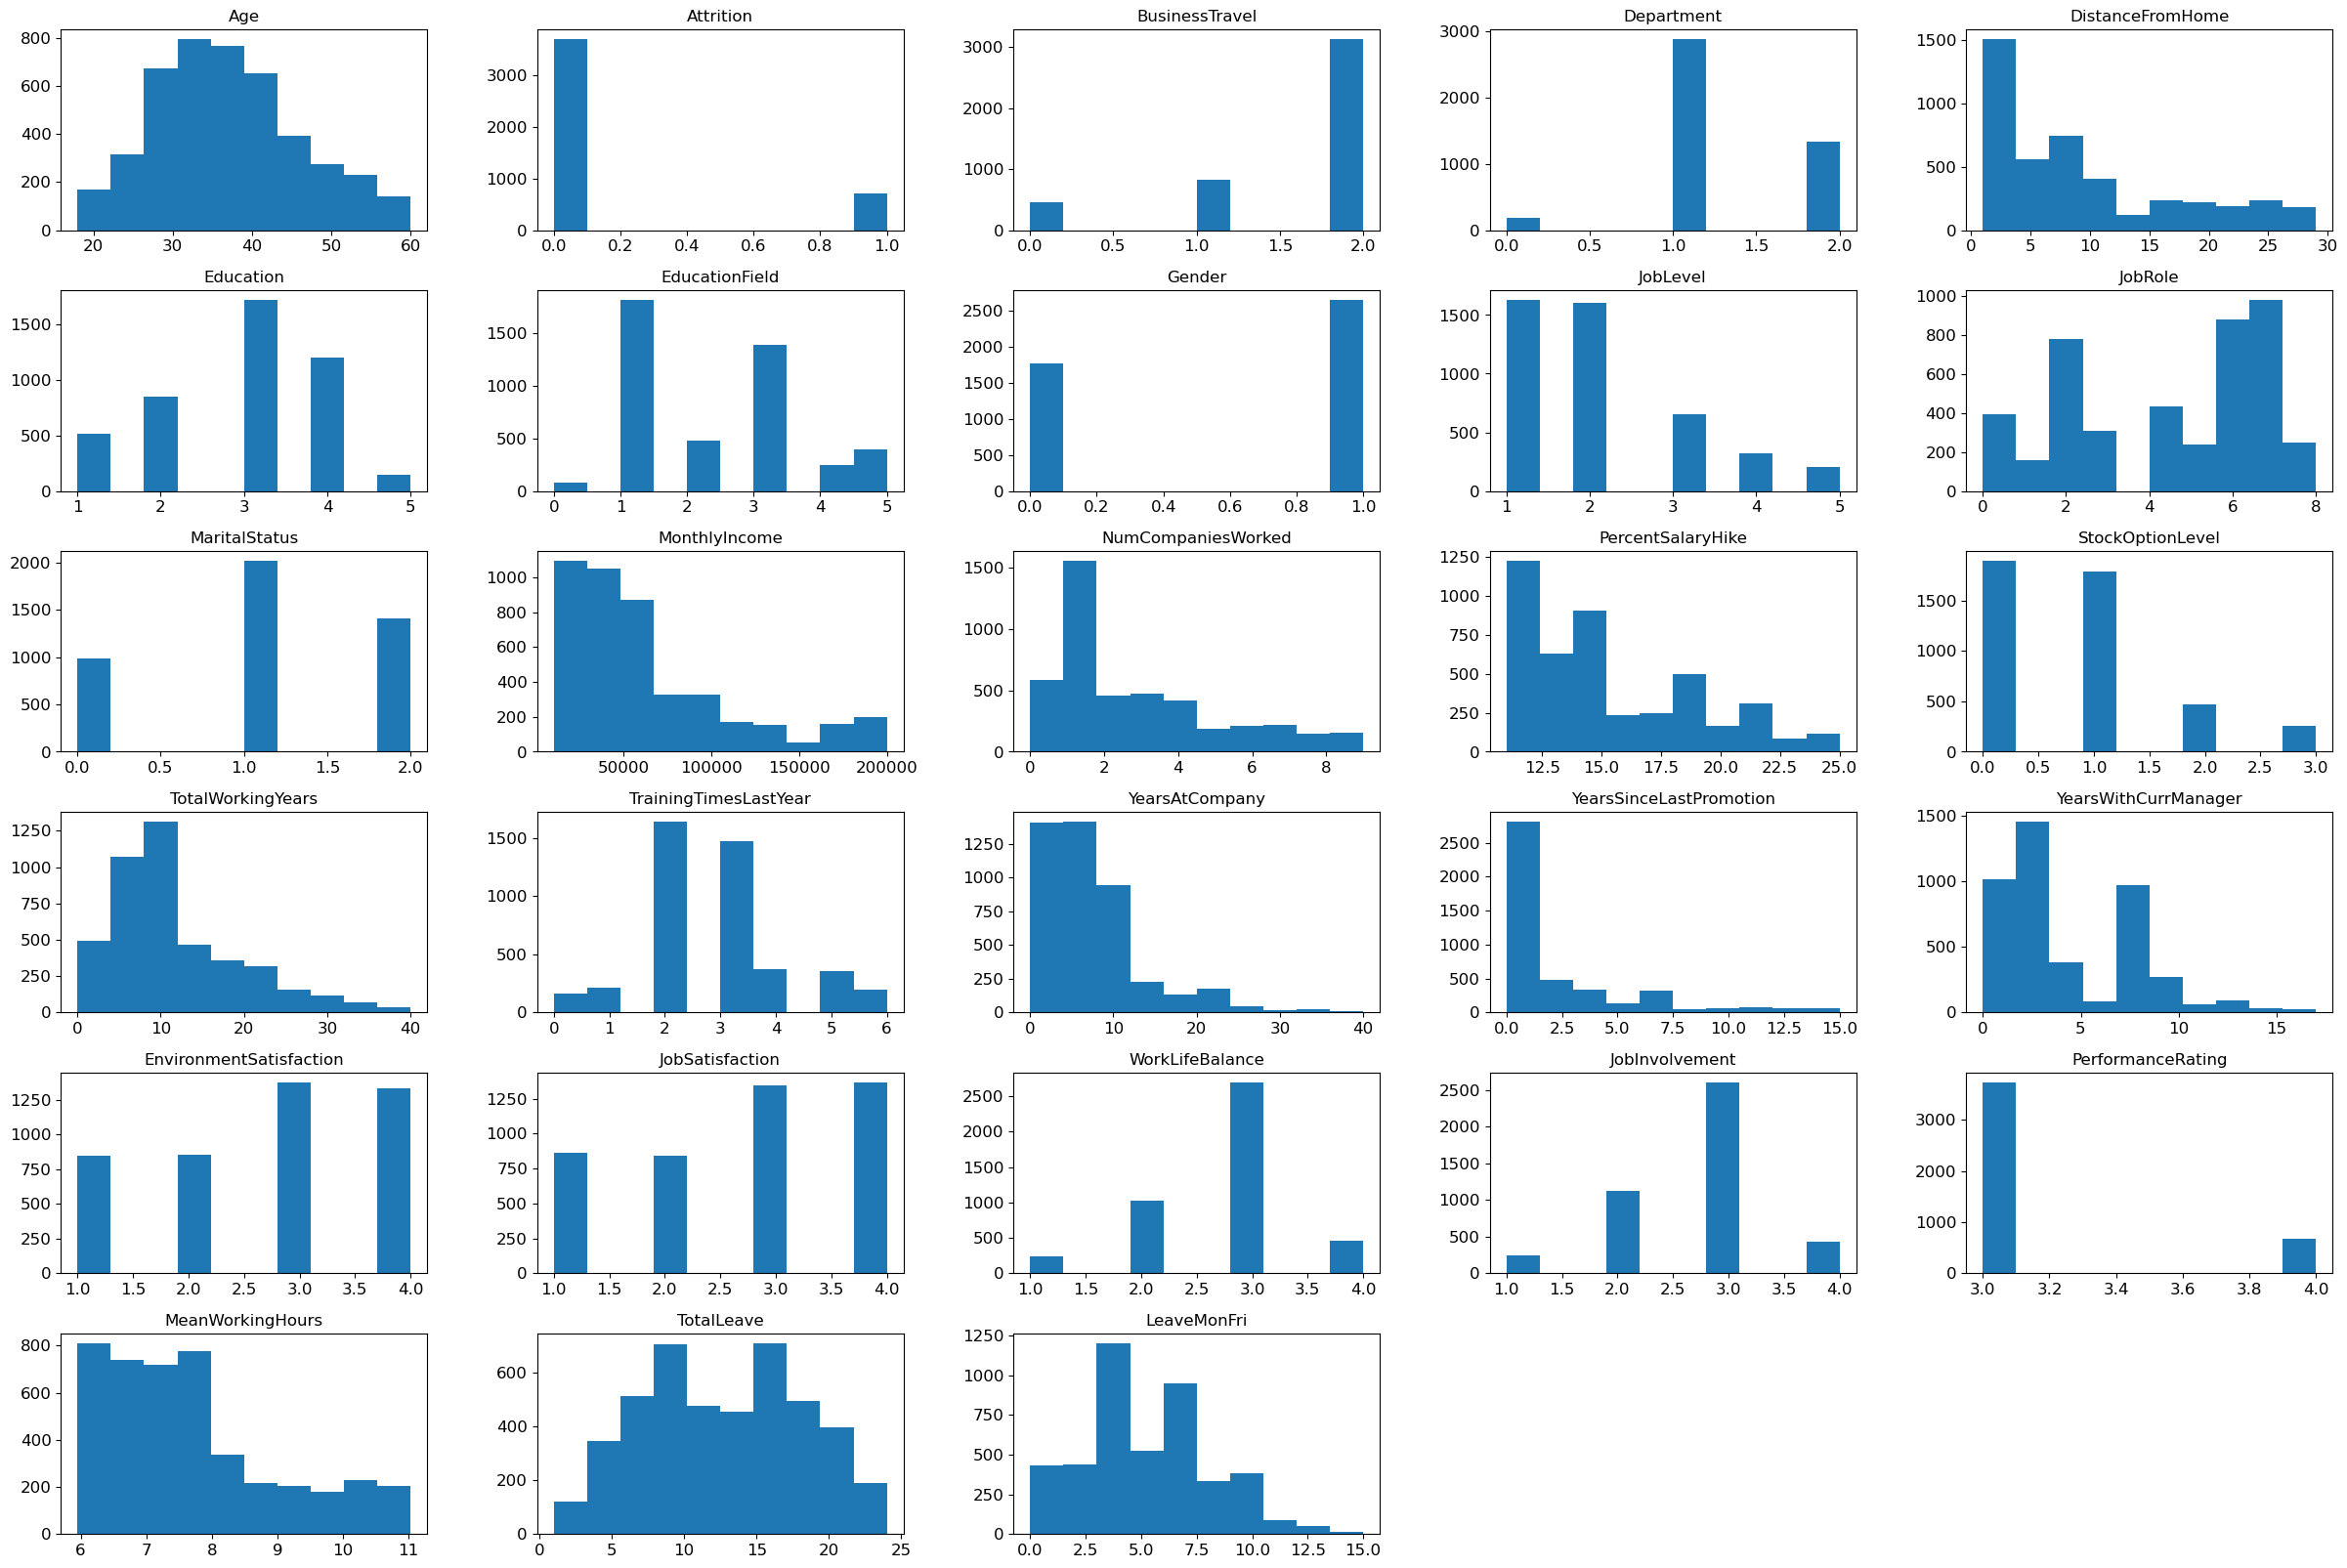

In [28]:
Employee.hist(figsize=(30,20),grid = False);

Ci-dessus nous voyons les données et leur densité, sans rajout ou retouche.

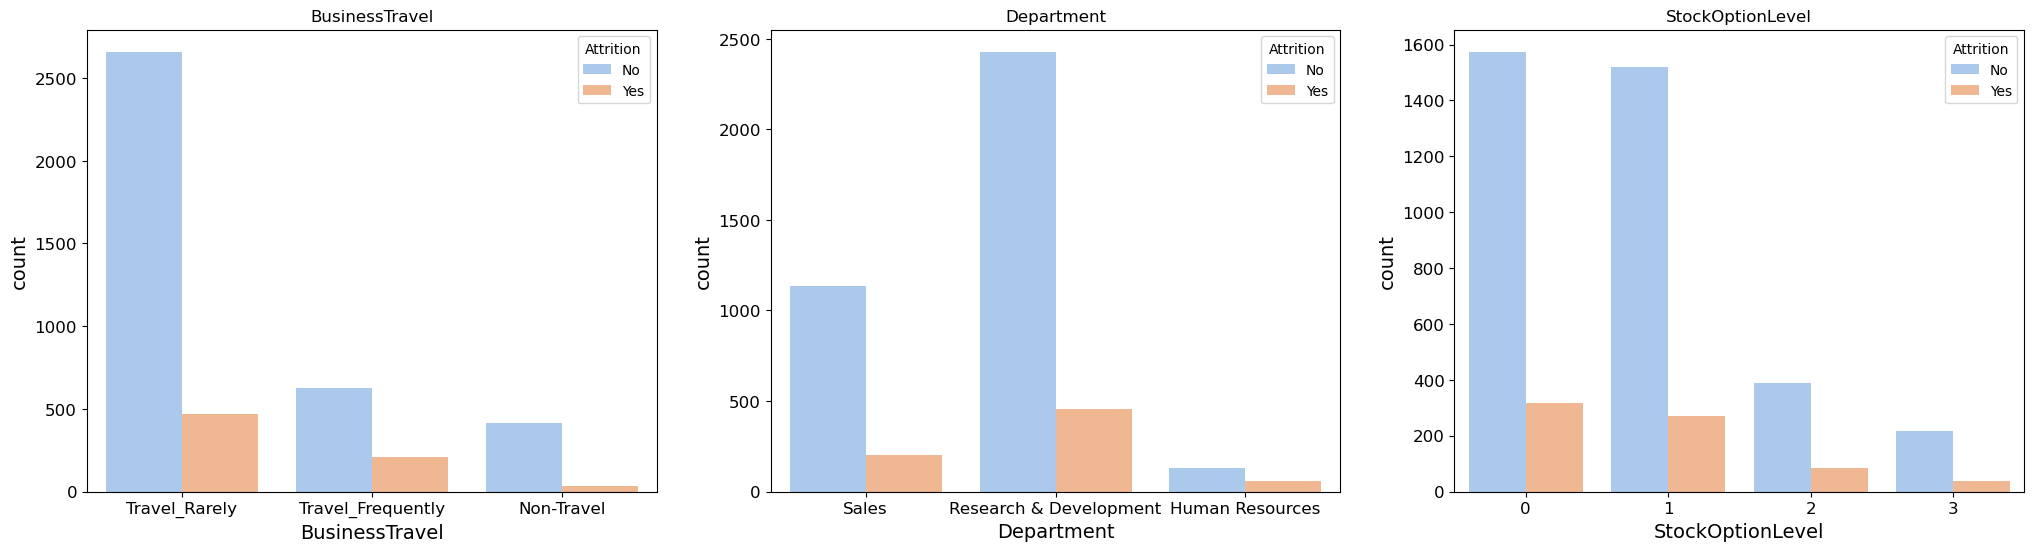

In [29]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=general_data, palette='pastel');
plt.title('BusinessTravel')

plt.subplot(1,3,2)
sns.countplot(x='Department', hue='Attrition', data=general_data, palette='pastel');
plt.title('Department')

plt.subplot(1,3,3)
sns.countplot(x='StockOptionLevel', hue='Attrition', data=general_data, palette='pastel');
plt.title('StockOptionLevel')

plt.show()

Observations:
    <li>-La plupart des employés sont dans le département de Recherche et Développement.
    <li>-La plupart des employés ne voyagent pas beaucoup pour le travail. une petite partie ne fait pas de voyage d'affaire.
    <li>-Beaucoup d'employés n'ont peu ou pas de StockOption de l'entreprise, au sein de l'entreprise.

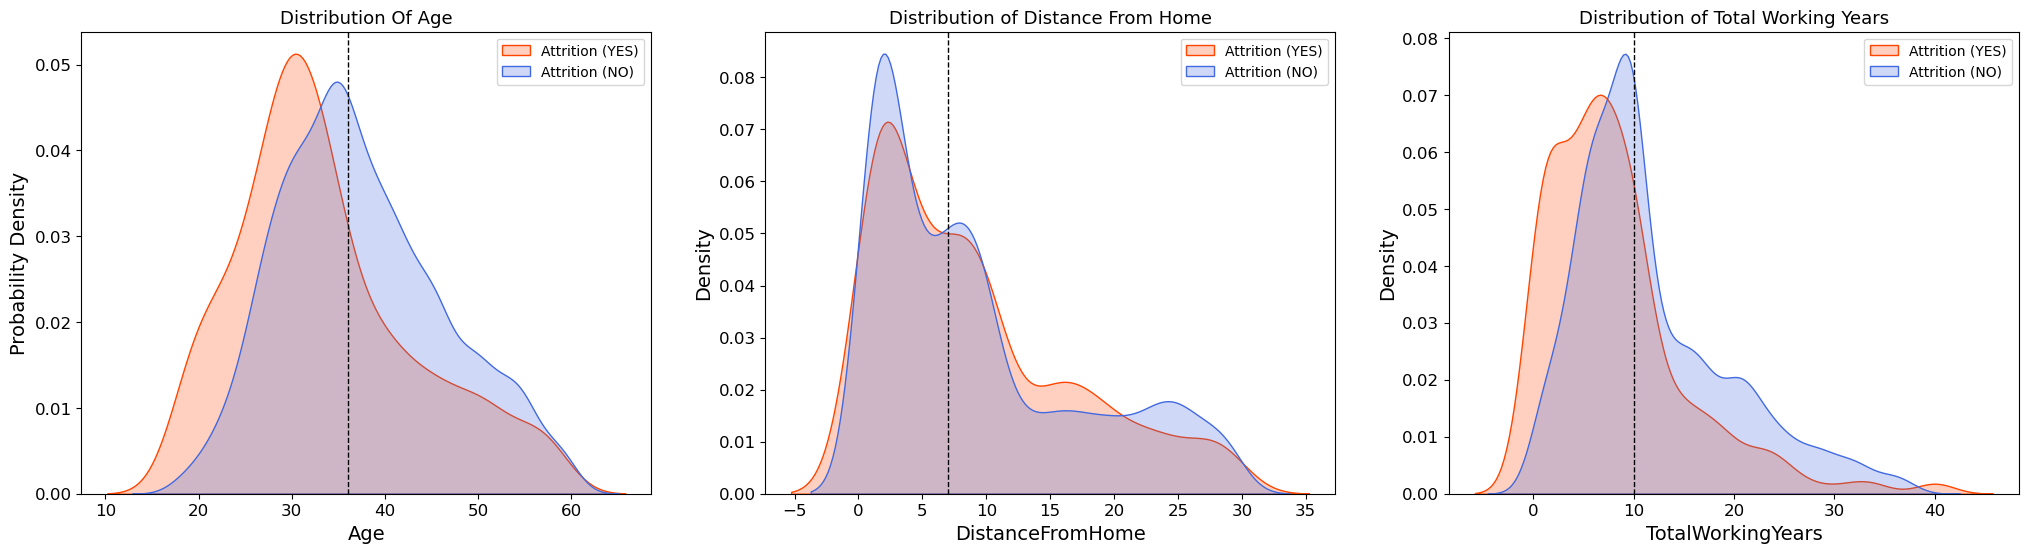

In [30]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.kdeplot(general_data['Age'][general_data.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(general_data['Age'][general_data.Attrition=='No'], shade=True, color='royalblue')
plt.axvline(general_data['Age'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution Of Age', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,2)
sns.kdeplot(general_data['DistanceFromHome'][general_data.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(general_data['DistanceFromHome'][general_data.Attrition=='No'], shade=True, color='royalblue')
plt.axvline(general_data['DistanceFromHome'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Distance From Home', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,3)
sns.kdeplot(general_data['TotalWorkingYears'][general_data.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(general_data['TotalWorkingYears'][general_data.Attrition=='No'], shade=True, color='royalblue')
plt.axvline(general_data['TotalWorkingYears'].median(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Total Working Years', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])


plt.show()

Observations :
    <li>-La médiane d'âge est de 36 ans, et plus les employés sont jeunes plus ils semblent vouloir partir de l'entreprise.
    <li>- La distance médiane que font les employés pour aller aux bureaux est de 7km. Plus la distance est grande plus le risque de quitter l'entreprise est grand.
    <li>-La médiane d'année passée dans l'entreprise est de 10 ans, et moins la personne a passé de temps dans l'entreprise, plus il y a de risques qu'elle quitte l'entreprise

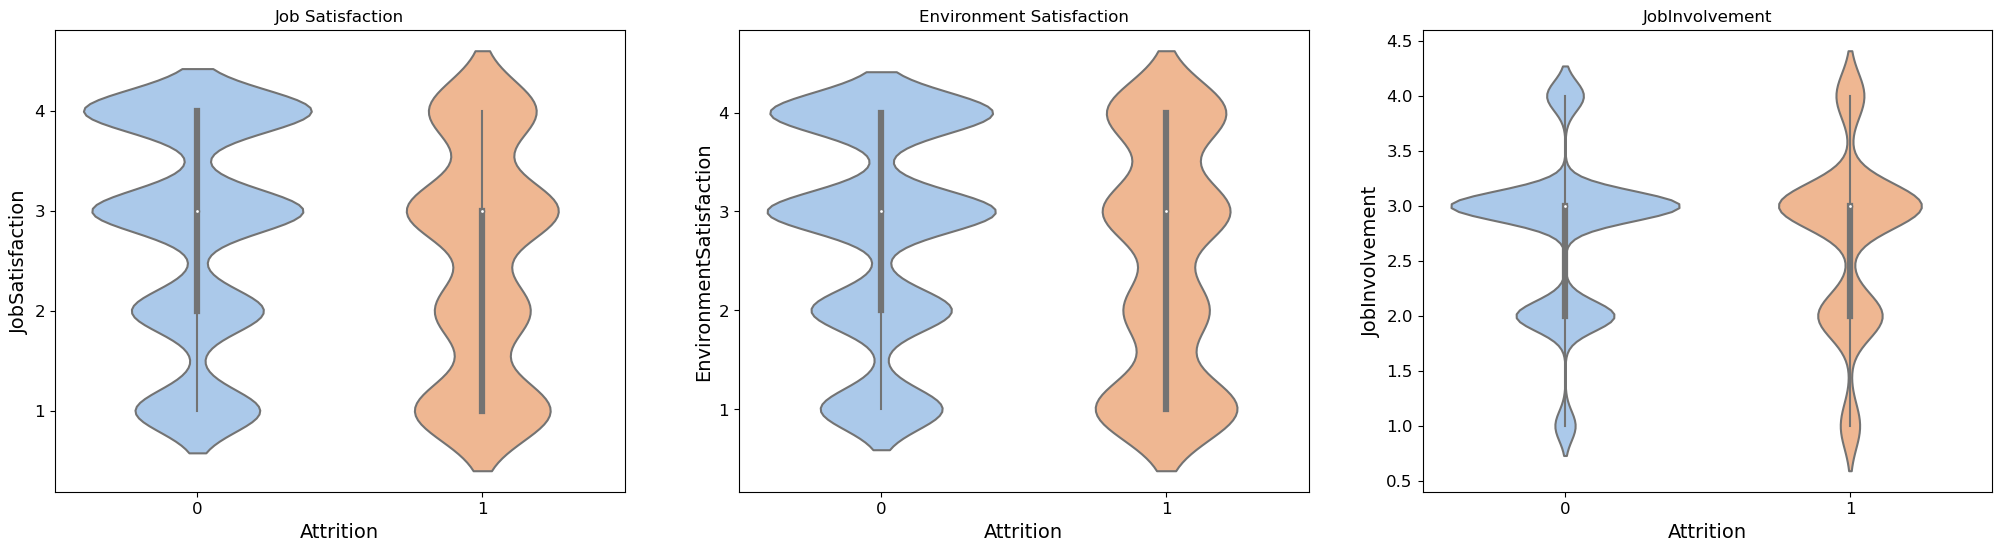

In [31]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.violinplot(data=Employee, x='Attrition', y='JobSatisfaction', palette='pastel')
plt.title('Job Satisfaction')

plt.subplot(1,3,2)
sns.violinplot(data=Employee, x='Attrition', y='EnvironmentSatisfaction', palette='pastel')
plt.title('Environment Satisfaction')

plt.subplot(1,3,3)
sns.violinplot(data=Employee, x='Attrition', y='JobInvolvement', palette='pastel')
plt.title('JobInvolvement')

plt.show()

Matrice de corrélation

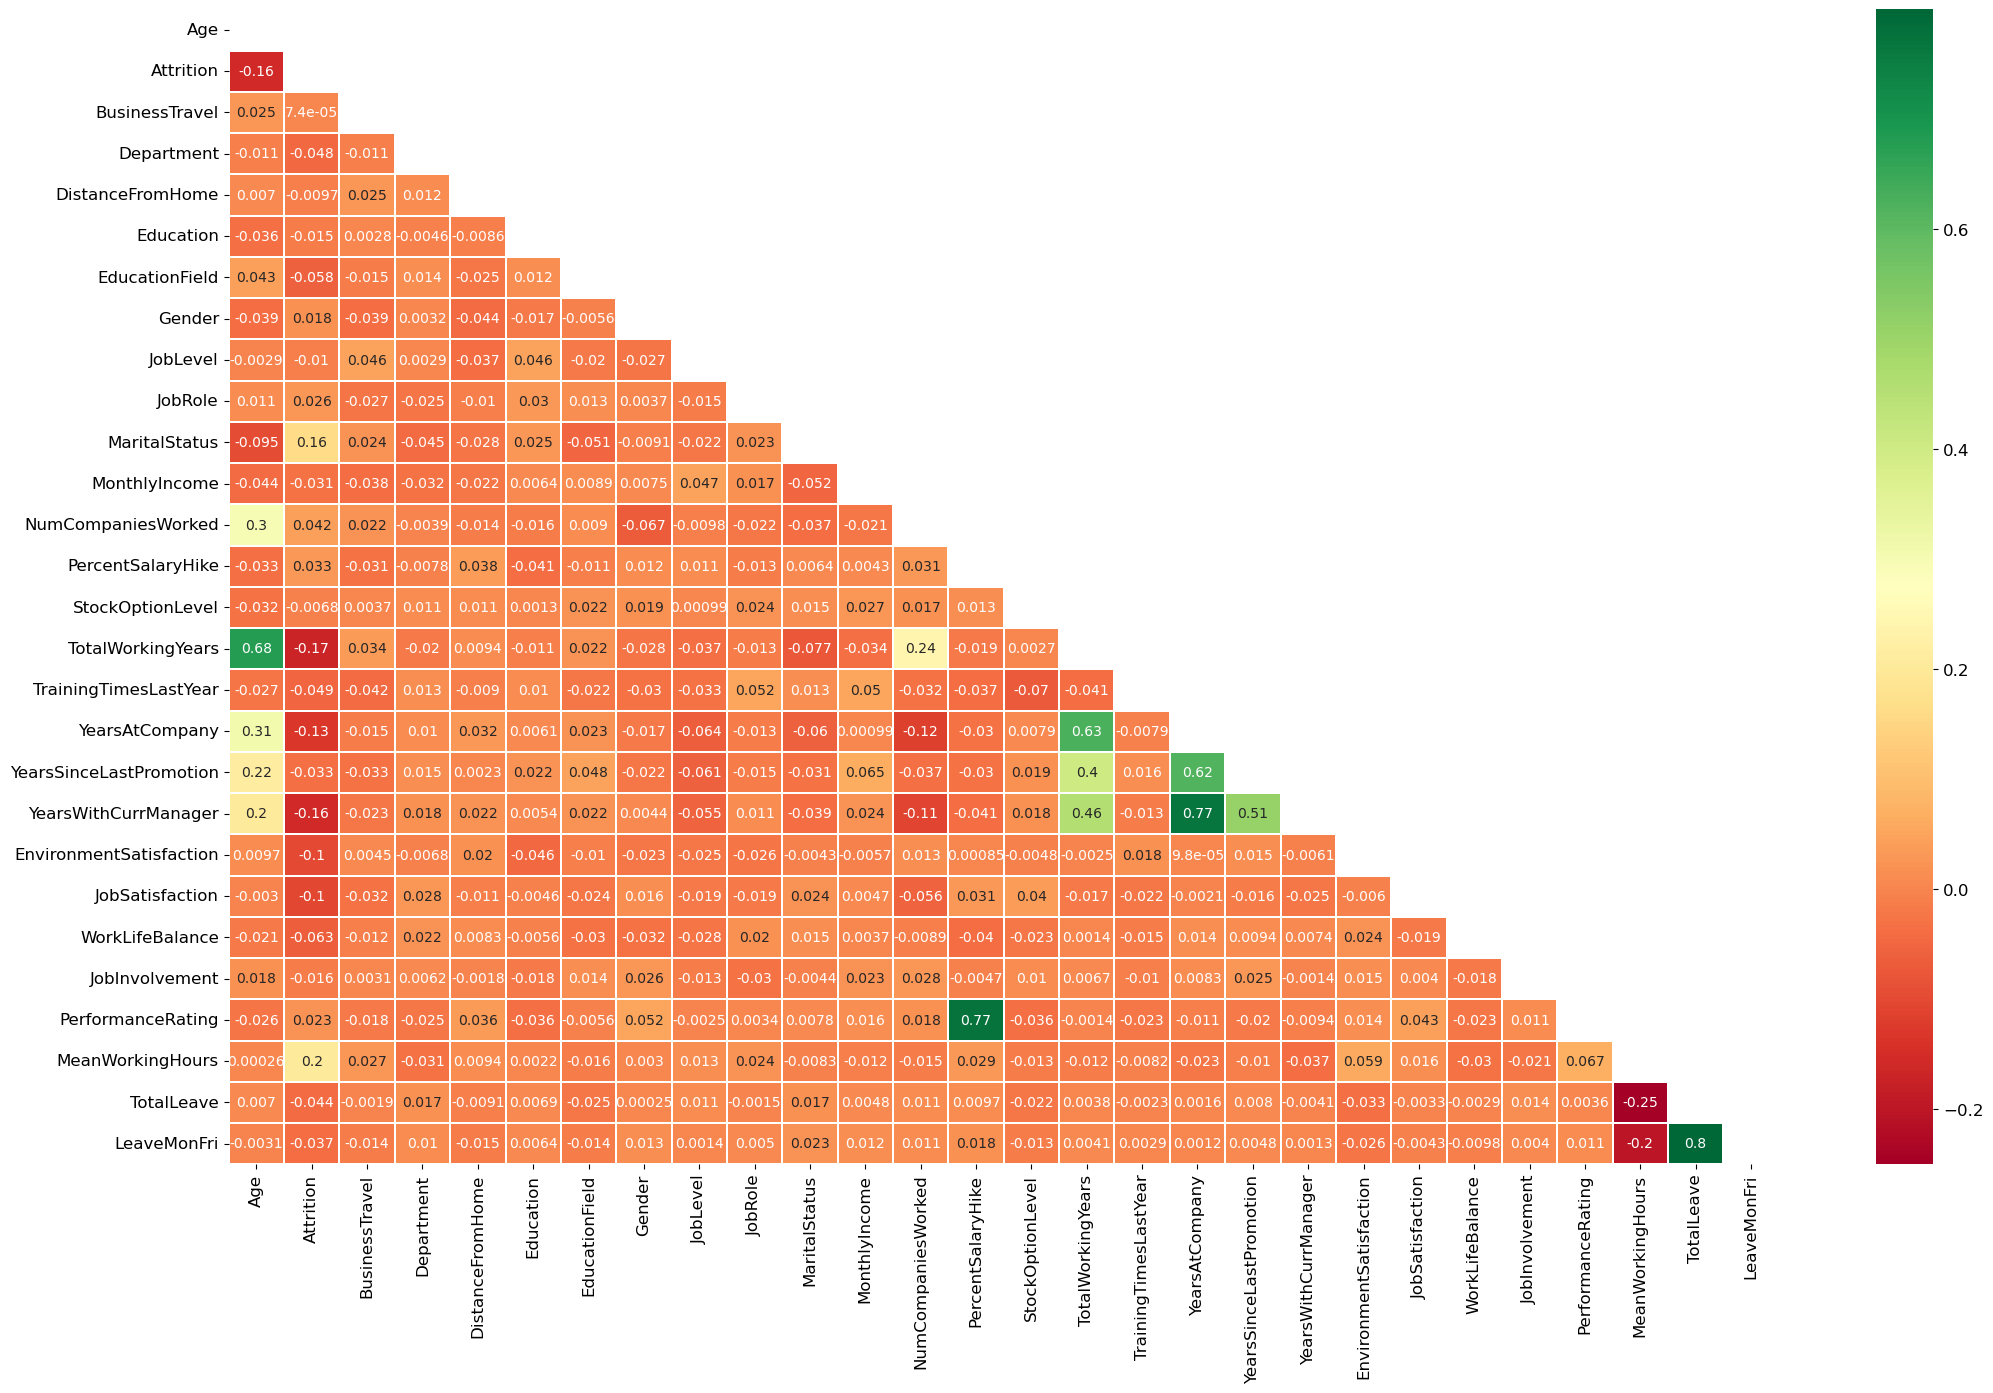

In [32]:
matrix = np.triu(Employee.corr())
plt.figure(figsize = (25, 15))
sns.heatmap(Employee.corr(), annot = True, linewidth = 0.02,cmap = 'RdYlGn', mask=matrix)
plt.show()

Cette matrice de corrélation va nous donner une compréhension de la corrélation entre les différents caractéristiques présentes dans notre jeu de données ( positives ou négatives) que l'on peu interpréter ensuite pour avoir une première idée.

Nous pouvons ici voir que "MeanWorkingHours","age" et "TotalWorkingYears" sont fortement corrélées avec le départ de l'entreprise, plus que les autres caractéristiques.

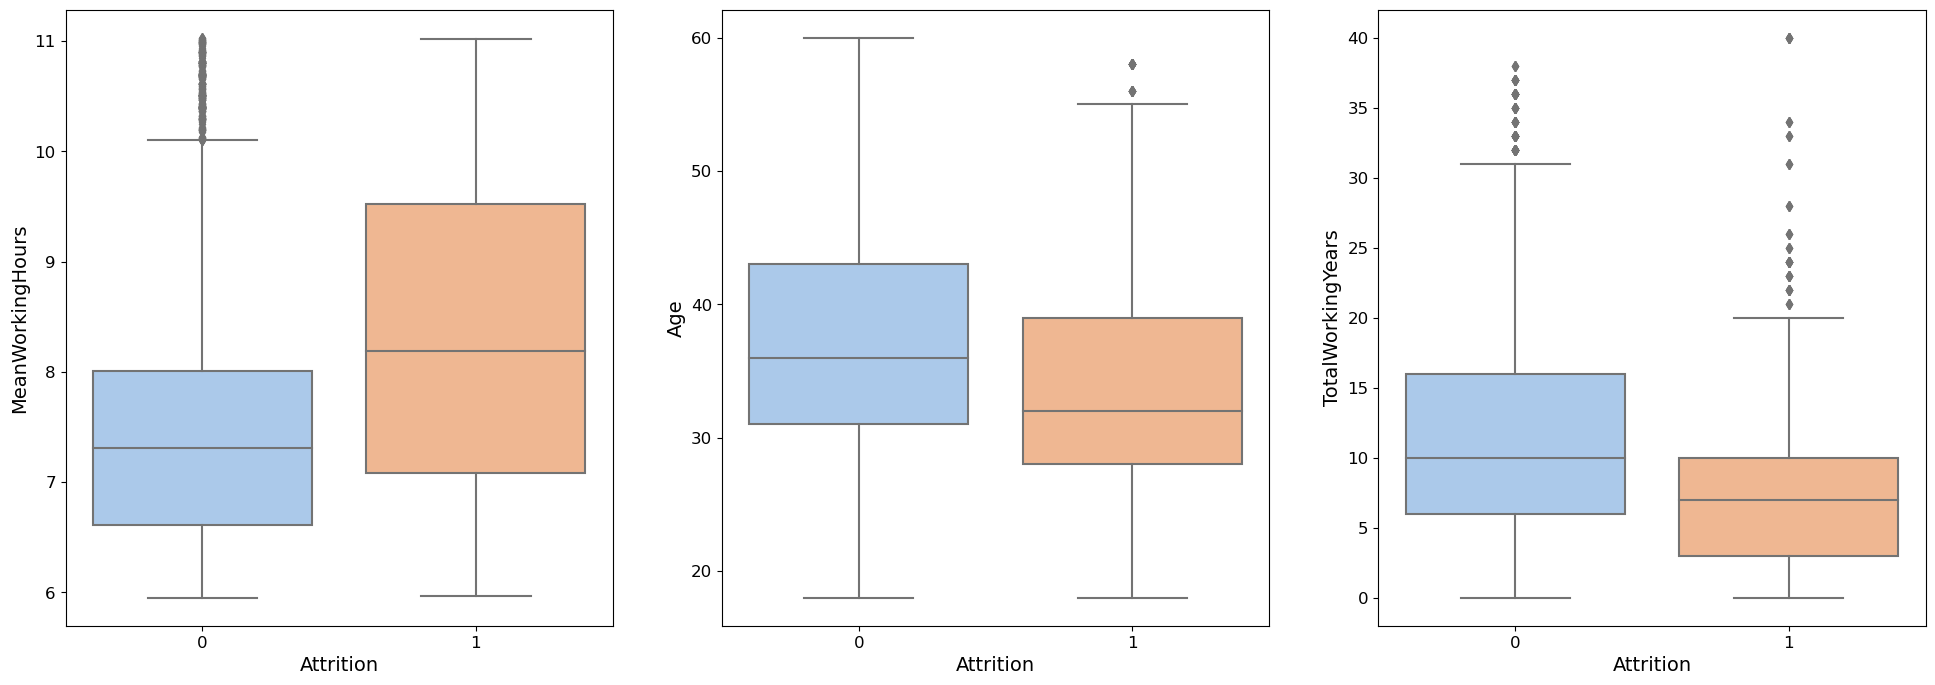

In [33]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.boxplot(x='Attrition', y='MeanWorkingHours', data=Employee, palette='pastel');
plt.subplot(1,3,2)
sns.boxplot(x='Attrition', y='Age', data=Employee, palette='pastel');
plt.subplot(1,3,3)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=Employee, palette='pastel');
plt.show()

Ici, nous voyons :
    <li> - Les employés qui sont partis sont ceux qui ont passé le plus de temps dans l'entreprise
    <li> - Plus les gens sont jeunes, plus ils ont tendance à partir de l'entreprise
    <li> - Moins les employés sont restés dans l'entreprise, plus ils ont quitté l'entreprise.    

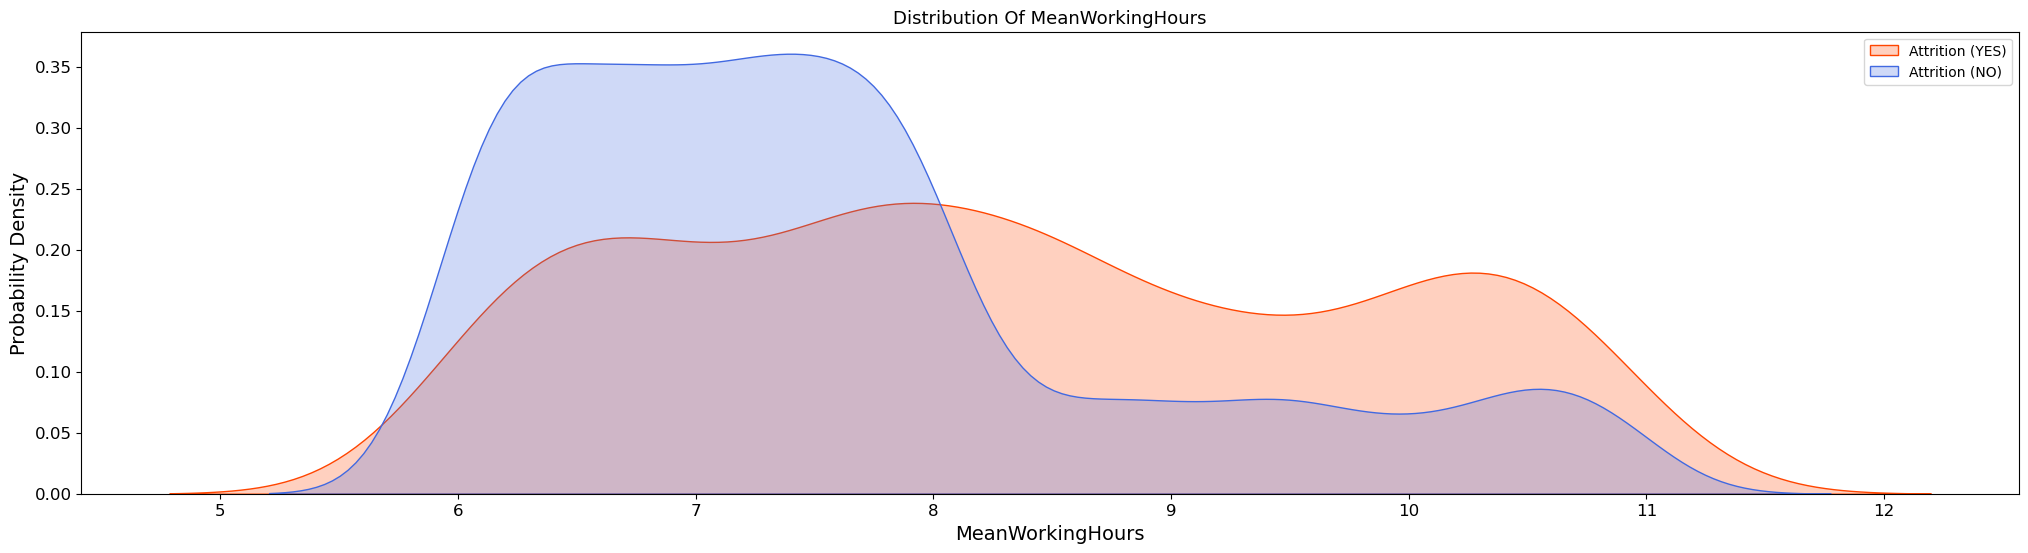

In [34]:
plt.figure(figsize=(25,6))
sns.kdeplot(general_data['MeanWorkingHours'][general_data.Attrition=='Yes'], shade=True, color='orangered');
sns.kdeplot(general_data['MeanWorkingHours'][general_data.Attrition=='No'], shade=True, color='royalblue');
plt.title('Distribution Of MeanWorkingHours', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)','Attrition (NO)']);

Ci-dessus de la même manière, on peut dire que les employés qui restent le plus longtemps dans l'entreprise sont ceux qui travaillent raisonnablement (6 à 8h), et ceux qui partent sont ceux qui travaillent plus que 8h par jour.

<h2> Réduction dimensionnelle

Nous allons normaliser toutes les données afin d'avoir des données qui restent dans la même intervalle, afin d'avoir des résultats cohérents.
Cela permet de conserver que les caractéristiques discriminantes pour éviter le surapprentissage des modèles.

In [35]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [36]:
scaler = StandardScaler()
scaler.fit(Employee)
Employee_scaled = scaler.transform(Employee)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
Employee_pca = pca.fit_transform(Employee_scaled)
Employee_pca.shape

(4410, 2)

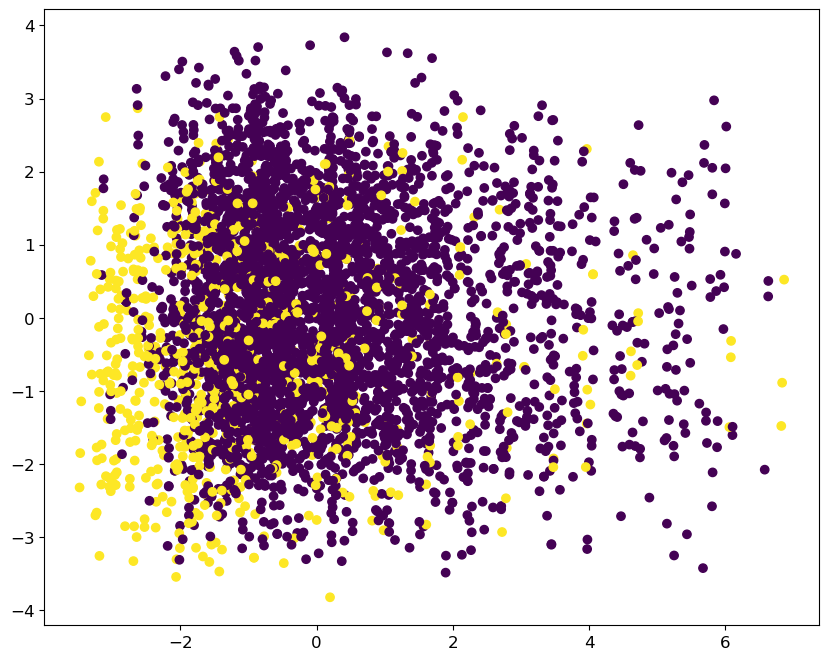

In [39]:
plt.figure(figsize=(10,8))

plt.scatter(Employee_pca[:,0],Employee_pca[:,1],c=Employee['Attrition']);

In [40]:
from sklearn.manifold import TSNE, Isomap

In [41]:
iso = Isomap(n_components=3, n_neighbors=20)
Employee_iso = iso.fit_transform(Employee_scaled)
Employee_scaled.shape

(4410, 28)

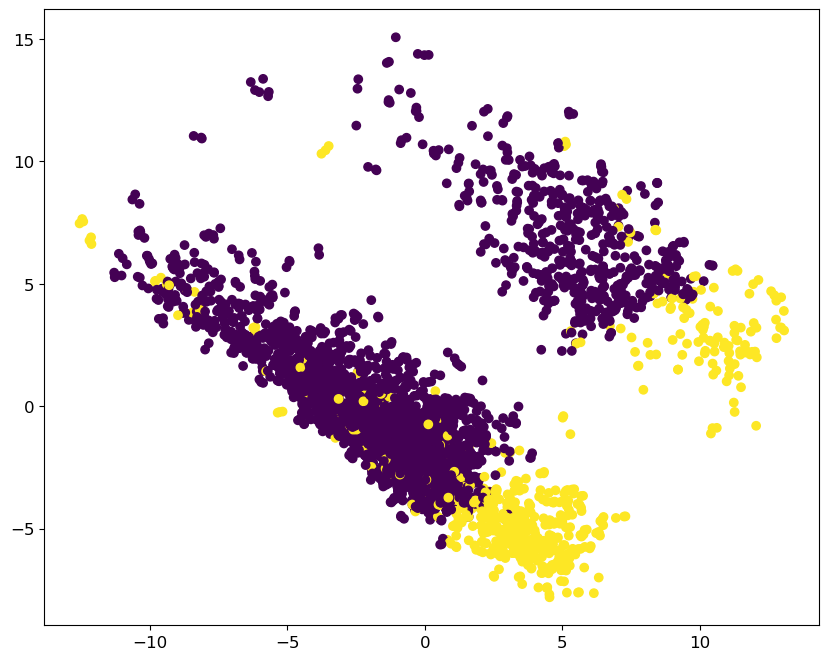

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(Employee_iso[:,0],Employee_iso[:,1],c=Employee['Attrition']);

<h2>Création des modèles 

Dans cette partie nous allons explorer différents modèles afin de trouver un modèle meilleur qu'un autre.

In [43]:
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from sklearn import metrics


Basic LogisticRegression 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.patches as mpatches

In [45]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =42)


In [46]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
LRtimerstart = timer()


In [47]:

lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lraccuracy = metrics.accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
lrroc_auc = metrics.auc(fpr, tpr)

lrf1_score = metrics.f1_score(y_test, y_pred)

lrrecall = metrics.recall_score(y_test, y_pred)

print('Model Accuracy: ', lraccuracy)
print('ROC_AUC Score: ', lrroc_auc)
print('F1 Score: ', lrf1_score)
print('Recall Score: ', lrrecall)


Model Accuracy:  0.854119425547997
ROC_AUC Score:  0.5947201621248706
F1 Score:  0.3180212014134276
Recall Score:  0.21634615384615385


In [48]:

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.patches as mpatches


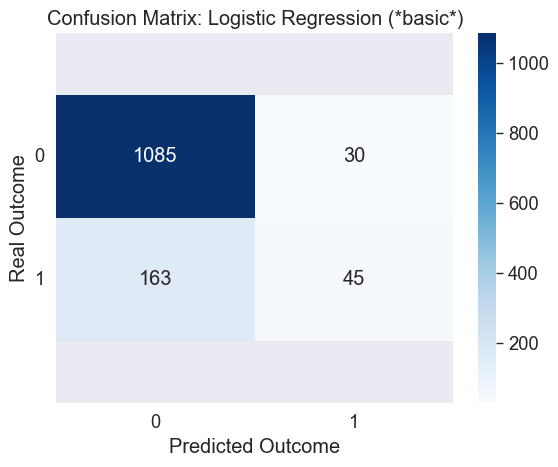

In [49]:
sns.set(context="paper", font_scale=1.5)
lrcm = confusion_matrix(y_test, y_pred)

ax = heatmap = sns.heatmap(lrcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Logistic Regression (*basic*)')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()
LRtimer = (timer() - LRtimerstart)

In [50]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =42)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lrtunedstart = timer()

lrtuned = LogisticRegression(random_state=42, class_weight="balanced")

lrtuned.fit(X_train, y_train)

y_pred = lrtuned.predict(X_test)
lrtunedaccuracy = metrics.accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
lrtunedroc_auc = metrics.auc(fpr, tpr)

lrtunedf1_score = metrics.f1_score(y_test, y_pred)

lrtunedrecall = metrics.recall_score(y_test, y_pred)

print('Model Accuracy: ', lrtunedaccuracy)
print('ROC_AUC Score: ', lrtunedroc_auc)
print('F1 Score: ', lrtunedf1_score)
print('Recall Score: ', lrtunedrecall)




Model Accuracy:  0.7014361300075586
ROC_AUC Score:  0.6996787685408762
F1 Score:  0.4233576642335766
Recall Score:  0.6971153846153846


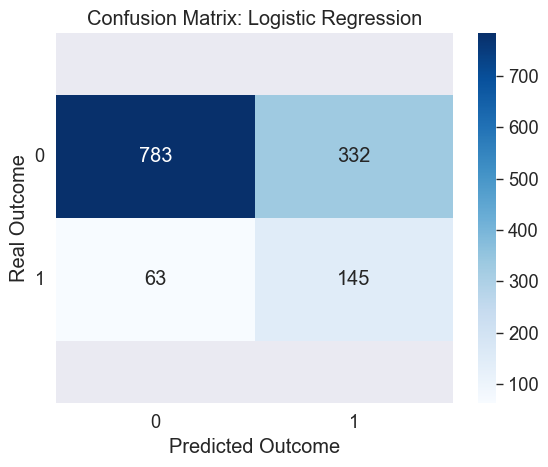

In [51]:
sns.set(context="paper", font_scale=1.5)
lrtunedcm = confusion_matrix(y_test, y_pred)

ax = heatmap = sns.heatmap(lrtunedcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
lrtunedtime = (timer() - lrtunedstart)

In [52]:
lrtunedcoef = []

for i in range(len(lrtuned.coef_)):
    for j in range(len(lrtuned.coef_[0])):
            featcoef = (lrtuned.coef_[0][j])
            lrtunedcoef.append(featcoef)

colname = X.columns.values

lrtunedtopfeat = pd.DataFrame( data = lrtunedcoef , index = colname, columns = ['Coefficient'])
lrtunedtopfeat = lrtunedtopfeat.sort_values(by = ['Coefficient'] ,ascending = False)
lrtunedtopfeat['Positive'] = lrtunedtopfeat['Coefficient']>0

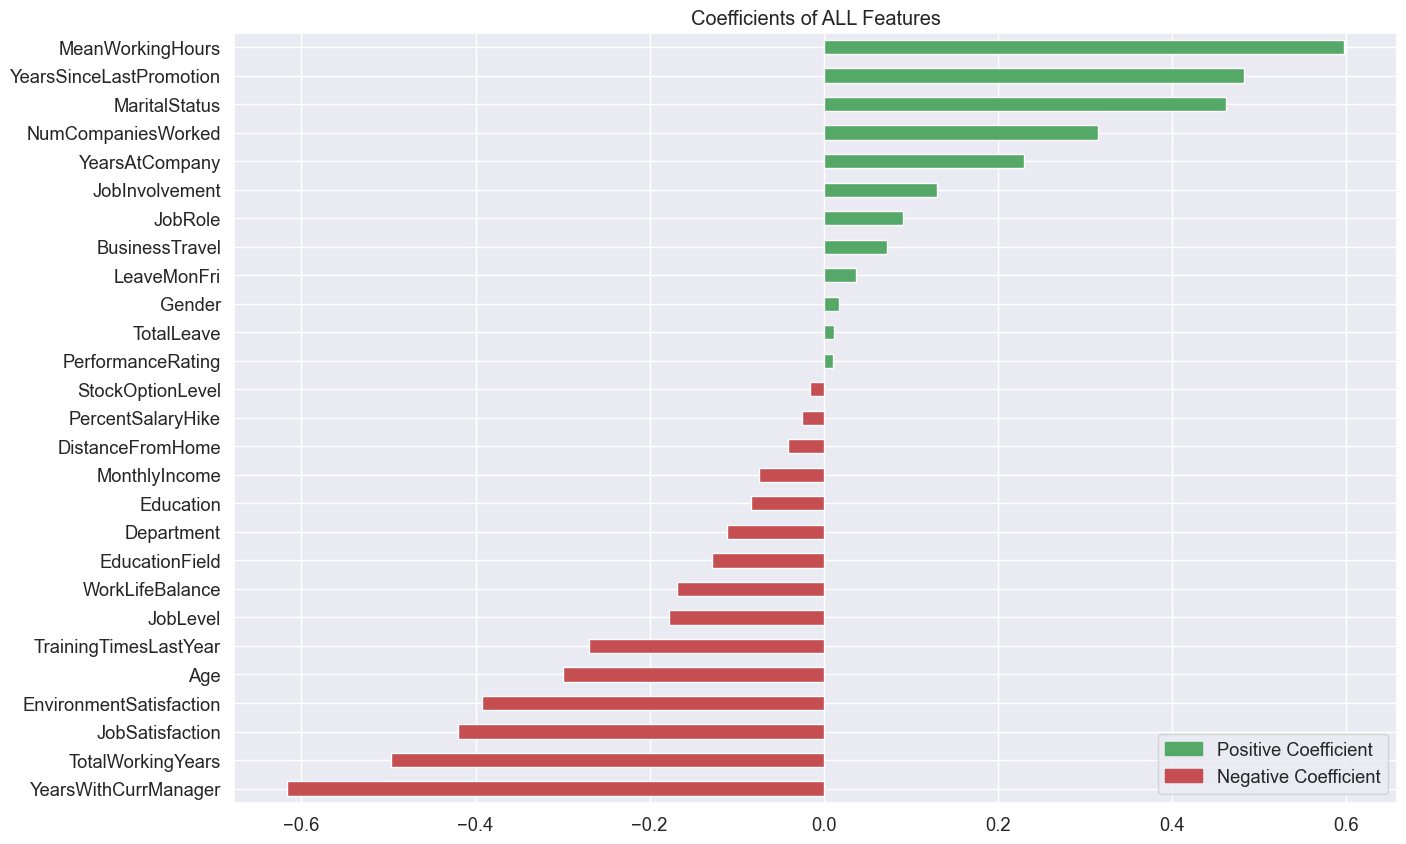

In [53]:
sns.set(context="paper", font_scale=1.2)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
lrtunedtopfeat['Coefficient'].plot(kind='barh', color=lrtunedtopfeat.Positive.map({True: 'g', False: 'r'}))
green = mpatches.Patch(color='g', label = 'Positive Coefficient')
red = mpatches.Patch(color='r', label = 'Negative Coefficient')
plt.gca().invert_yaxis()
plt.legend(handles = [green, red], loc='lower right')
plt.title('Coefficients of ALL Features')
plt.show()

Ci-dessus nous pouvons voir qu'il y a plusieurs coefficients négatifs, et ils sont supérieurs en nombre par rapport aux positifs. Les coefficients négatifs ont une relation inverse avec la donnée 'Attrition'. Si l'on prend la donnée qui a le plus gros coefficient négatif, cela s'interprète de la façon suivante : 
Moins l'employé a passé de temps avec le manager actuel, plus de chances il y a que l'employé quitte l'entreprise.

Cependant comme expliqué dans la partie éthique de notre étude, nous avons dit que le statut marital serait écarté, même si il pourrait être une donnée importante

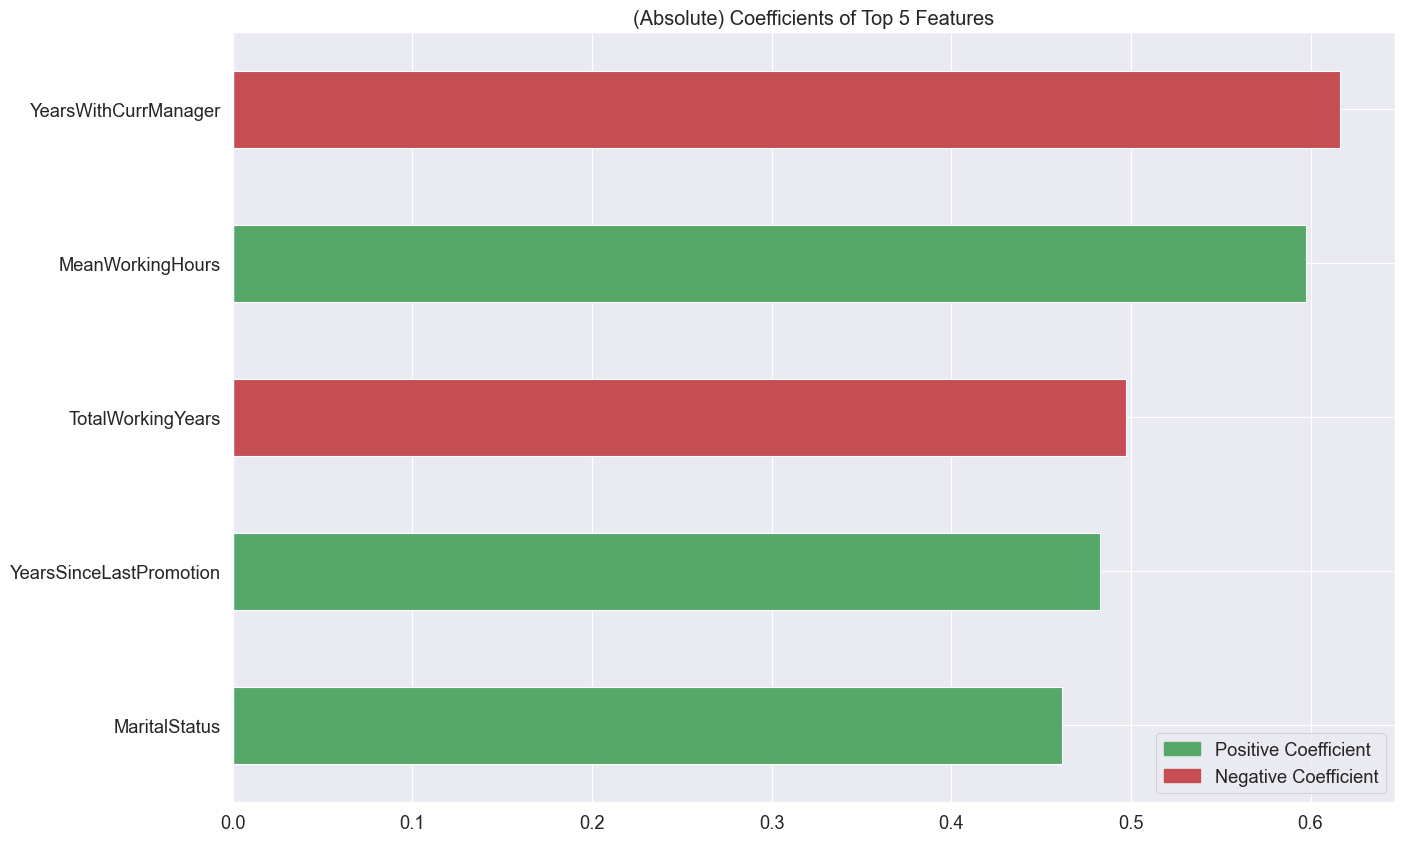

In [54]:
lrtunedtopfeat['AbsCoef'] = lrtunedtopfeat['Coefficient'].abs()
lrtunedtopfeat = lrtunedtopfeat.sort_values(by = 'AbsCoef', ascending = False)[0:5]

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
lrtunedtopfeat['AbsCoef'].plot(kind = 'barh', color=lrtunedtopfeat.Positive.map({True: 'g', False: 'r'}))
plt.gca().invert_yaxis()
plt.legend(handles = [green, red], loc='lower right')
plt.title('(Absolute) Coefficients of Top 5 Features')
plt.show()

<h4> Random Forest par défaut

In [55]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.30, random_state=42)

In [56]:
#TimerStart
rfstart = timer()

rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = None, random_state=42, class_weight = "balanced")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [57]:
rfaccuracy = metrics.accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
rfroc_auc = metrics.auc(fpr, tpr)

rff1_score = metrics.f1_score(y_test, y_pred)

rfrecall = metrics.recall_score(y_test, y_pred)

print('Model Accuracy: ', rfaccuracy)
print('ROC_AUC Score: ', rfroc_auc)
print('F1 Score: ', rff1_score)
print('Recall Score: ', rfrecall)

Model Accuracy:  0.9674981103552532
ROC_AUC Score:  0.933787512935495
F1 Score:  0.8953771289537712
Recall Score:  0.8846153846153846


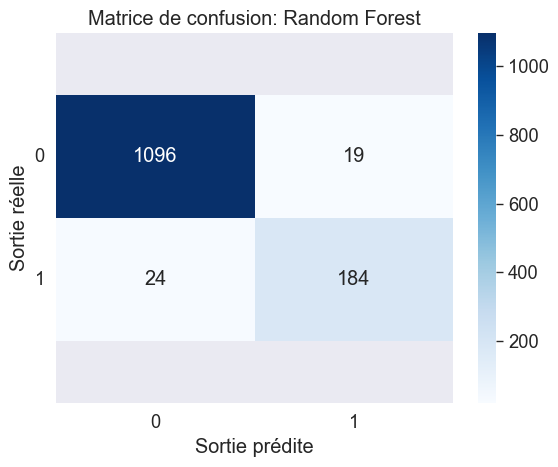

In [58]:
sns.set(context="paper", font_scale=1.5)

rfcm = confusion_matrix(y_test, y_pred)

ax = heatmap = sns.heatmap(rfcm, cmap="Blues", annot= True,fmt=".0f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Matrice de confusion: Random Forest')
plt.ylabel('Sortie réelle')
plt.xlabel('Sortie prédite')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
rftime = (timer() - rfstart)

Le modèle Random Forest semble déjà utilisable et cohérent au vu des métriques, mais tentons de l'améliorer.

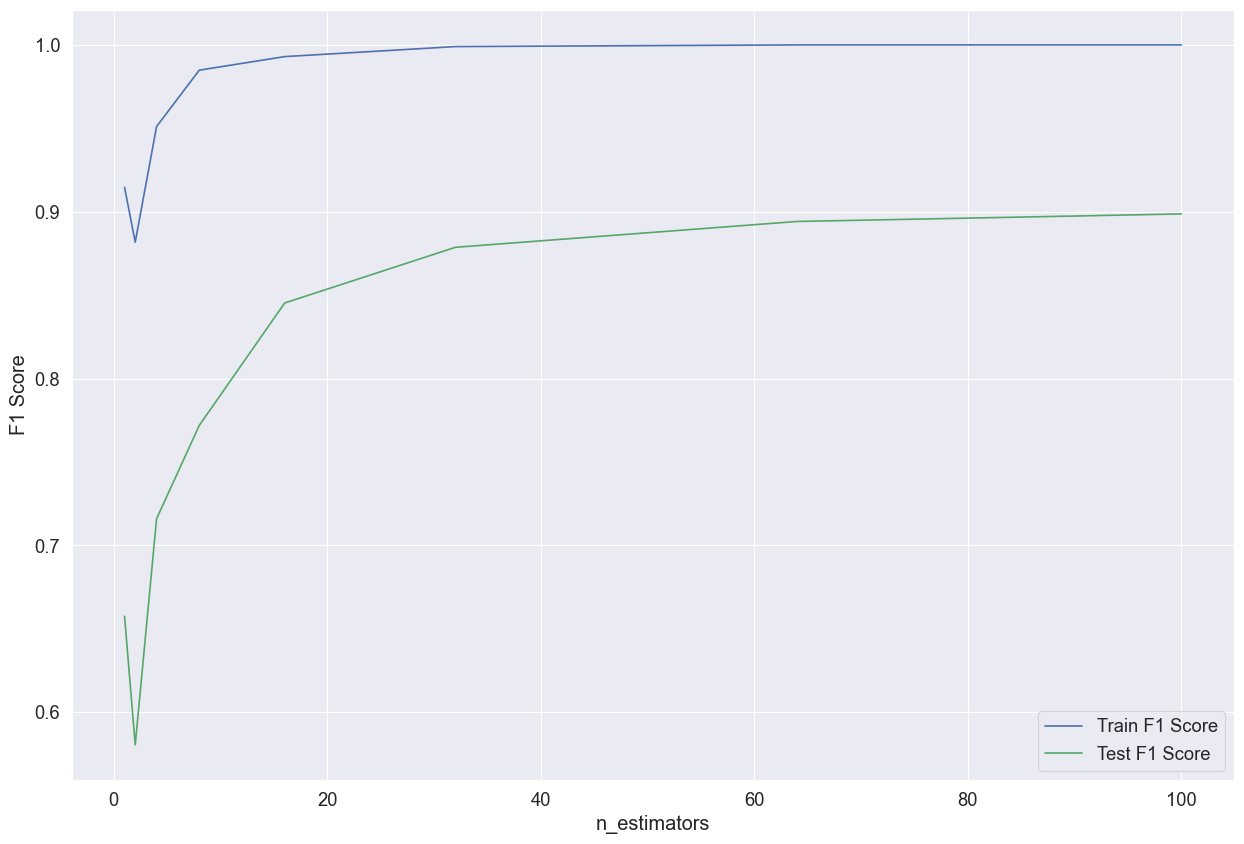

In [59]:
#TimerStart
rftunedstart = timer()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
trainf1 = []
testf1 = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, random_state=42, class_weight = "balanced")
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    f1train = f1_score(y_train, train_pred)
    trainf1.append(f1train)
    
    y_pred = rf.predict(X_test)
    
    f1test = f1_score(y_test, y_pred)
    testf1.append(f1test)
    

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
plt.plot(n_estimators, trainf1, 'b', label= 'Train F1 Score')
plt.plot(n_estimators, testf1, 'g', label= 'Test F1 Score')

plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.show()

In [60]:
a = list(zip(n_estimators, testf1))
b = pd.DataFrame( data = a , columns = ('NTrees','Accuracy'))
bestntree = int(b.iloc[ b['Accuracy'].idxmax(axis = 0) , 0])
print('Optimum No. of Trees: ' , bestntree)

Optimum No. of Trees:  100


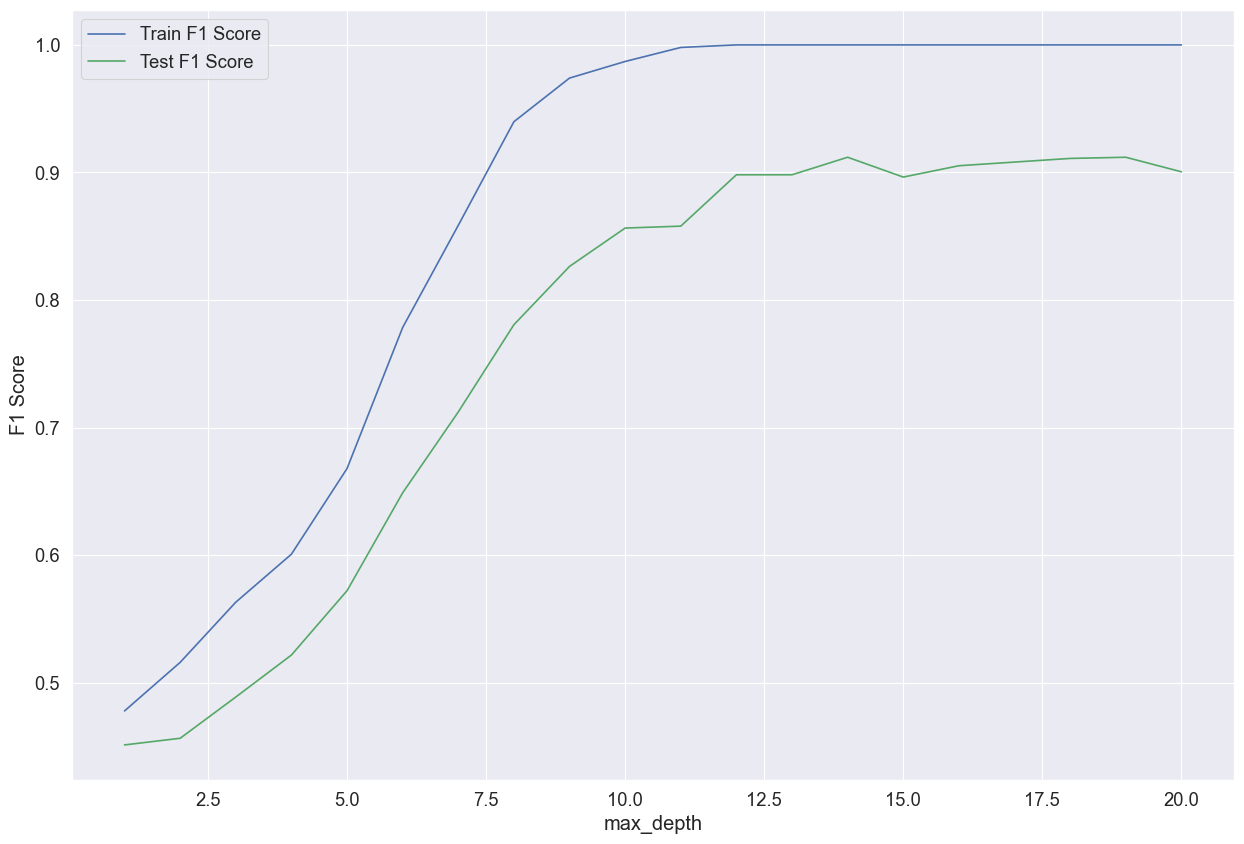

In [61]:
max_depth = np.arange(1,21,1)
trainf1 = []
testf1 = []

for i in max_depth:
    rf = RandomForestClassifier(n_estimators = bestntree, max_depth=i, random_state=42,class_weight = "balanced")
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    f1train = f1_score(y_train, train_pred)
    trainf1.append(f1train)
    
    y_pred = rf.predict(X_test)
    
    f1test = f1_score(y_test, y_pred)
    testf1.append(f1test)

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
plt.plot(max_depth, trainf1, 'b', label= 'Train F1 Score')
plt.plot(max_depth, testf1, 'g', label= 'Test F1 Score')

plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('max_depth')
plt.show()

In [62]:
c = list(zip(max_depth, testf1))
d = pd.DataFrame( data = c , columns = ('NDepth','Accuracy'))
bestndepth = int(d.iloc[ d['Accuracy'].idxmax(axis = 0) , 0])
print('Optimum Max Depth: ' , bestndepth) 

Optimum Max Depth:  14


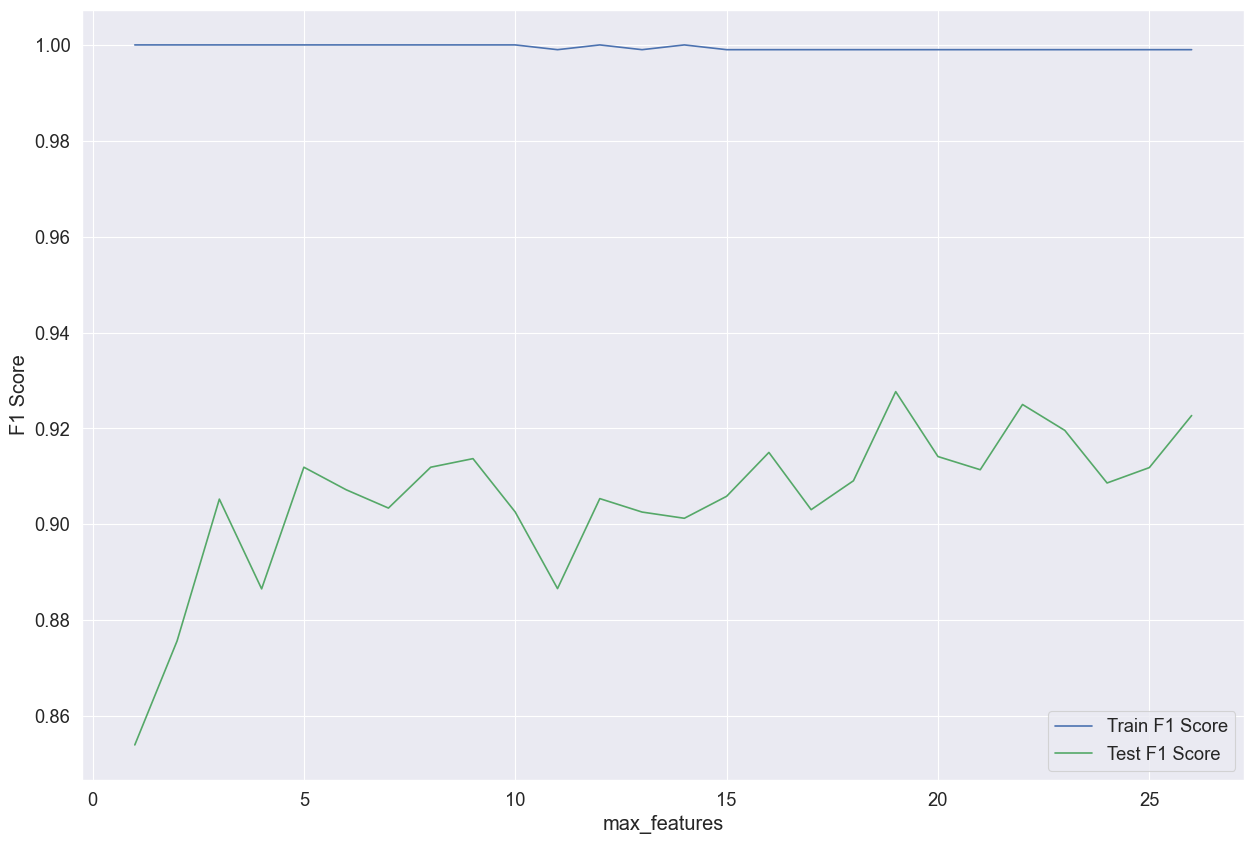

In [63]:
max_features = list(range(1,X_train.shape[1]))
trainf1 = []
testf1 = []
for i in max_features:
    rf = RandomForestClassifier(n_estimators = bestntree, max_depth=bestndepth, max_features=i, random_state=42,class_weight = "balanced")
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    f1train = f1_score(y_train, train_pred)
    trainf1.append(f1train)
    
    y_pred = rf.predict(X_test)
    
    f1test = f1_score(y_test, y_pred)
    testf1.append(f1test)

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
plt.plot(max_features, trainf1, 'b', label= 'Train F1 Score')
plt.plot(max_features, testf1, 'g', label= 'Test F1 Score')

plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('max_features')
plt.show()

Interprétation de ce graphique :
<br>
Nous voyons que notre F1 score entraîné semble parfait.
Il suit presque parfaitement le score parfait.
Cela nous indique qu'il y a peut être un sur-apprentissage, que nous allons tenté de corrigé dans la partie Random Forest Optimisé.

In [64]:
e = list(zip(max_features, testf1))
f = pd.DataFrame( data = e , columns = ('NFeat','Accuracy'))
bestnfeat = int(f.iloc[ f['Accuracy'].idxmax(axis = 0) , 0])
print('Optimum Max Feature: ' , bestnfeat)

Optimum Max Feature:  19


Nous pouvons donc utiliser ces paramètres qui sont censés être les meilleurs

In [65]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.30, random_state=42)

rftuned = RandomForestClassifier(n_estimators = bestntree, max_depth = bestndepth , max_features = bestnfeat, random_state=42, class_weight="balanced")
rftuned.fit(X_train, y_train)
y_pred = rftuned.predict(X_test)
rftunedaccuracy = metrics.accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
rftunedroc_auc = metrics.auc(fpr, tpr)

rftunedf1_score = metrics.f1_score(y_test, y_pred)

rftunedrecall = metrics.recall_score(y_test, y_pred)

print('Model Accuracy: ', rftunedaccuracy)
print('ROC_AUC Score: ', rftunedroc_auc)
print('F1 Score: ', rftunedf1_score)
print('Recall: ', rftunedrecall)

Model Accuracy:  0.9780801209372638
ROC_AUC Score:  0.9439763711624698
F1 Score:  0.9276807980049875
Recall:  0.8942307692307693


Nous allons pouvoir voir si les données importantes qui ressortent de cet algorithme sont concordantes et cohérentes
avec l'éthique que nous nous imposons.

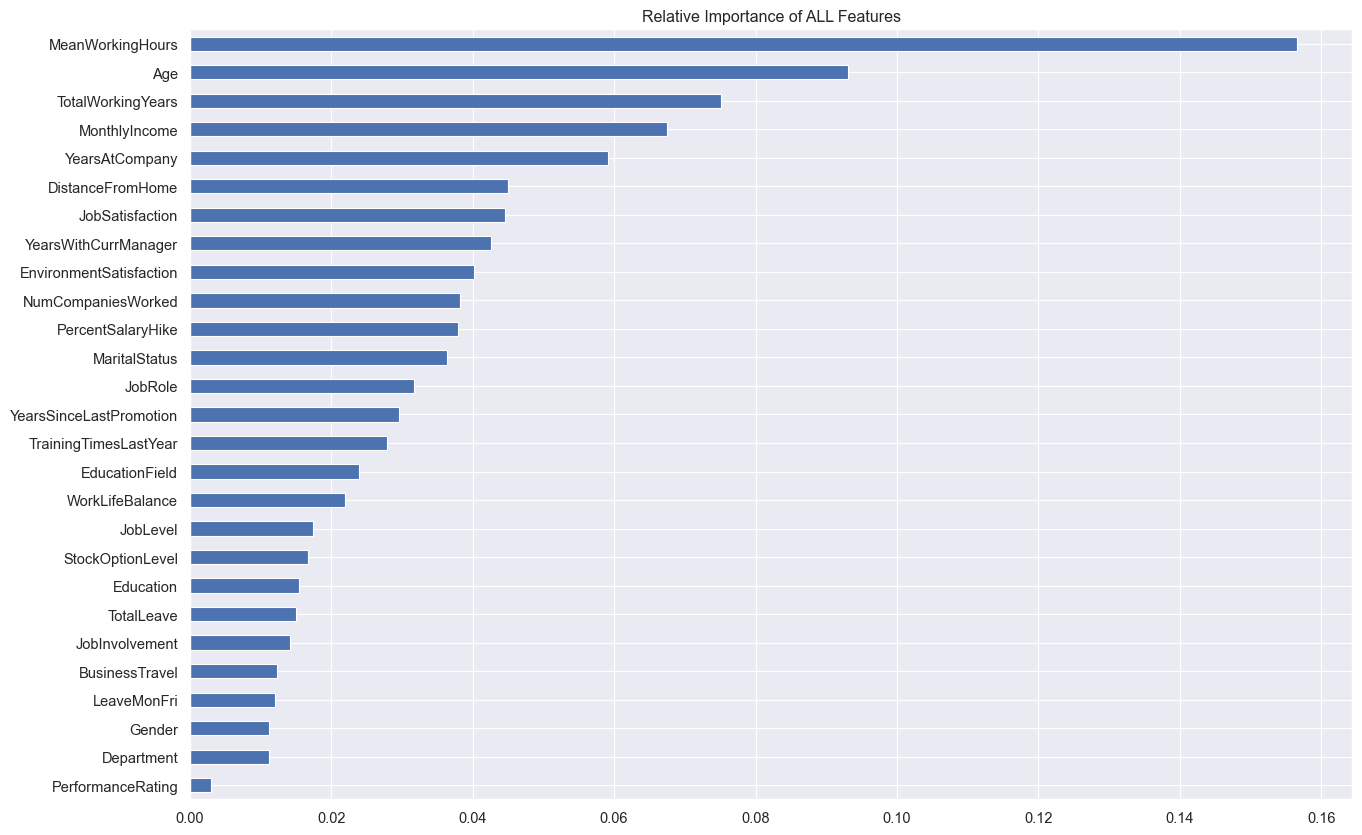

In [66]:
feature_importances = pd.DataFrame(rftuned.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(15,10))
sns.set(context="paper", font_scale=1.2)
feature_importances['importance'].plot(kind='barh')
plt.title('Relative Importance of ALL Features')
plt.gca().invert_yaxis()
plt.show()

A la différence de ce même genre de graphique utilisé pour le decision tree pour voir la prépondérance des différentes caractéristiques, ce graphique semble plus logique et cohérente avec notre éthique. 

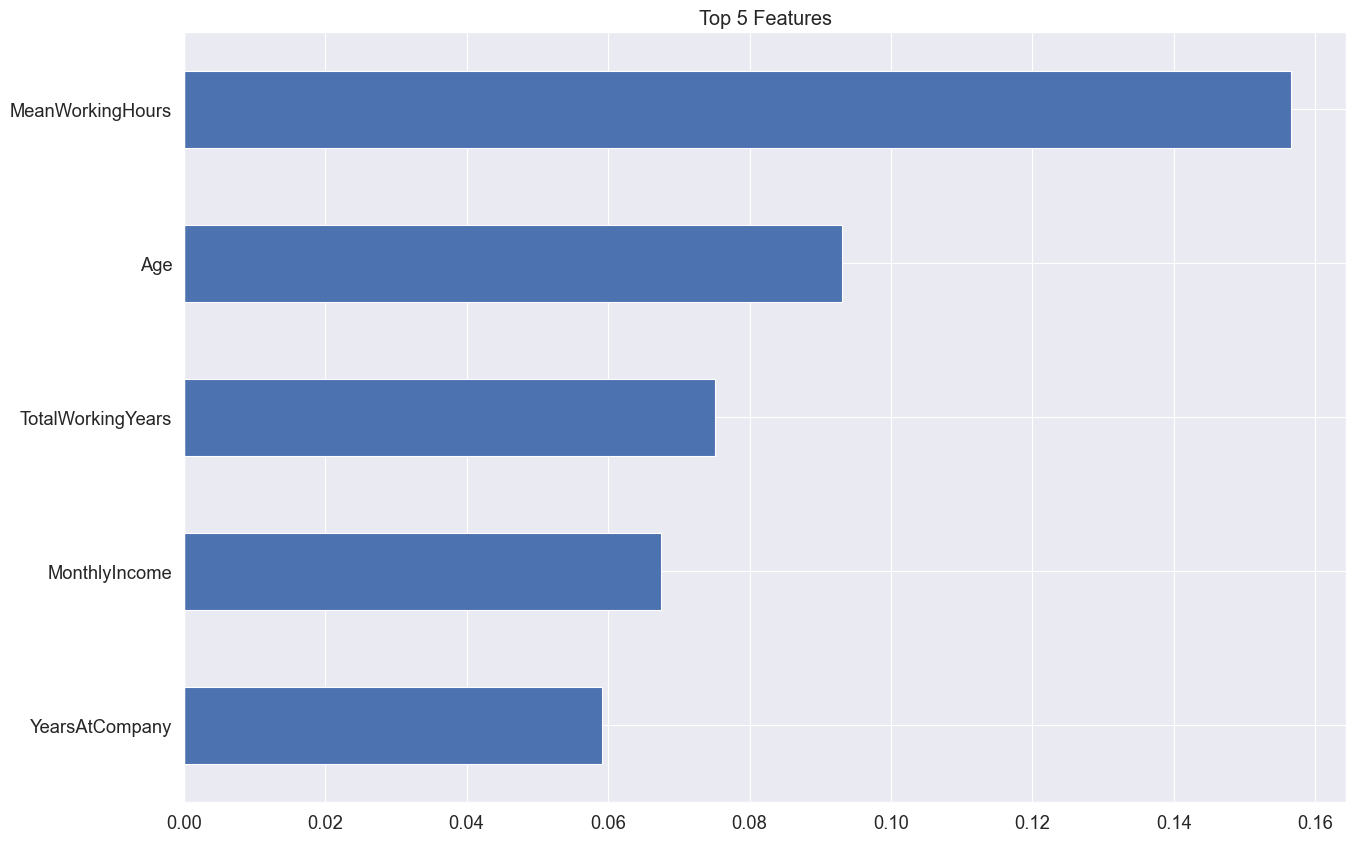

In [67]:
feature_importances = pd.DataFrame(rftuned.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)[0:5]

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
feature_importances['importance'].plot(kind='barh')
plt.title('Top 5 Features')
plt.gca().invert_yaxis()
plt.show()

Ci-dessus nous voyons donc les 5 caractéristiques les plus importante lorsque l'on parle de démission 
au sein de l'entreprise.

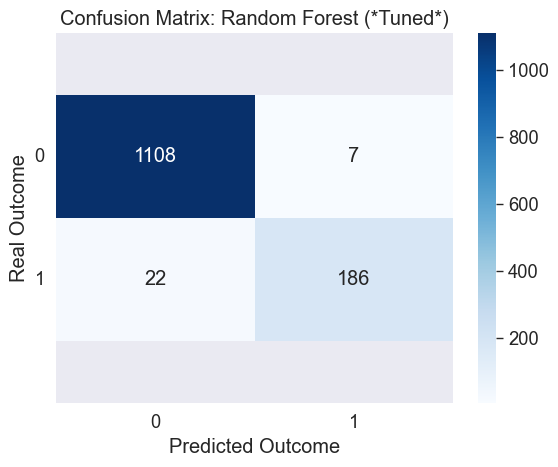

In [68]:
sns.set(context="paper", font_scale=1.5)

rftcm = confusion_matrix(y_test,y_pred)

ax = heatmap = sns.heatmap(rftcm, cmap="Blues", annot= True,fmt=".0f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Random Forest (*Tuned*)')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
rftunedtime = (timer() - rftunedstart)

En tentant d'améliorer le Random Forest avec des hyperparamètres optimisés, nous avons vu que 
nous tombions dans le sur-apprentissage, nous corrigerons ceci pour voir si nous avions raison.

<h4> Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']

X_train_dt,X_test_dt, y_train_dt, y_test_dt= train_test_split(X,y, test_size = 0.30, random_state=42)

In [71]:
X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.fit_transform(X_test_dt)
DTCstart = timer()
print(X_train_dt.shape,X_test_dt.shape)

(3087, 27) (1323, 27)


In [72]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [73]:
yhat_DT = DT.predict(X_test_dt)
print (yhat_DT [0:5])
print (y_test_dt [0:5])

[0 0 0 1 0]
EmployeeID
1414    0
3353    0
3971    0
3630    1
145     0
Name: Attrition, dtype: int32


In [74]:
DTAccuracy = metrics.accuracy_score(y_test_dt,yhat_DT)
DTF1Score = f1_score(y_test_dt, yhat_DT, average='weighted')
DTRecall = metrics.recall_score(y_test_dt,yhat_DT)
fpr, tpr, thresholds = metrics.roc_curve(y_test_dt, yhat_DT)
DTRoc_Auc = metrics.auc(fpr, tpr)

print("Decision Tree's Accuracy: ", DTAccuracy)
print("FI SCORE: ", DTF1Score)
print("ROC_AUC Score:", DTRoc_Auc)
print("Recall Score: ", DTRecall)

Decision Tree's Accuracy:  0.926681783824641
FI SCORE:  0.9250748182601656
ROC_AUC Score: 0.8411327181786823
Recall Score:  0.7163461538461539


Matrice de confusion

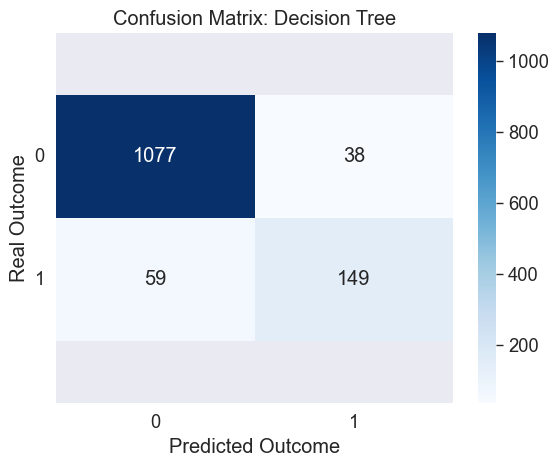

0.3064202999999992


In [75]:
sns.set(context="paper", font_scale=1.5)

dtccm = confusion_matrix(y_test_dt,yhat_DT)

ax = heatmap = sns.heatmap(dtccm, cmap="Blues", annot= True,fmt=".0f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Confusion Matrix: Decision Tree')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()
#End timer 
dtctimer = (timer() - DTCstart)
print(dtctimer)

<h4>Modèle Random Forest pour supprimer le sûr apprentissage.

Comme vu précédemment, notre modèle de Random Forest semblait tomber dans le sur-appretissage.
Nous allons vérifier et corriger cela.

Le but est de trouver le nombre de "tree" le plus optimal en faisant plusieurs itération de Random Forest pour choisir le nombre d'estimation à choisir pour avoir le meilleur F1 score

In [76]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']
X_train_rf_tuned,X_test_rf_tuned, y_train_rf_tuned, y_test_rf_tuned= train_test_split(X,y, test_size = 0.50, random_state=42)

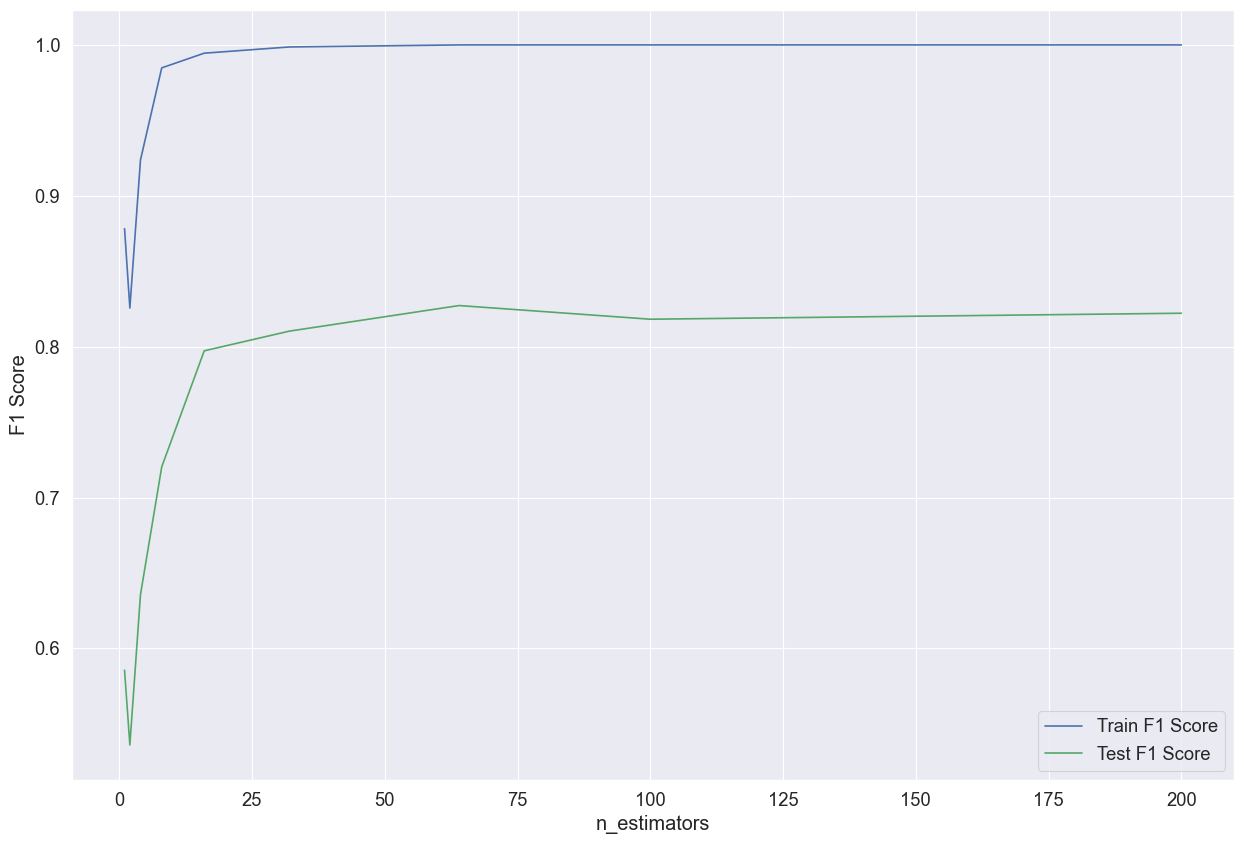

In [77]:
#TimerStart
rftunedstart2 = timer()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
trainf1 = []
testf1 = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, random_state=42, class_weight = "balanced")
    rf.fit(X_train_rf_tuned, y_train_rf_tuned)
    
    train_pred_rftuned = rf.predict(X_train_rf_tuned)
    
    f1train = f1_score(y_train_rf_tuned, train_pred_rftuned)
    trainf1.append(f1train)
    
    y_pred = rf.predict(X_test_rf_tuned)
    
    f1test = f1_score(y_test_rf_tuned, y_pred)
    testf1.append(f1test)
    

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
plt.plot(n_estimators, trainf1, 'b', label= 'Train F1 Score')
plt.plot(n_estimators, testf1, 'g', label= 'Test F1 Score')

plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.show()

In [78]:
a = list(zip(n_estimators, testf1))
b = pd.DataFrame( data = a , columns = ('NTrees','Accuracy'))
bestntree = int(b.iloc[ b['Accuracy'].idxmax(axis = 0) , 0])
print('Optimum No. of Trees: ' , bestntree)

Optimum No. of Trees:  64


Le nombre optimal de paramètre 'tree' à utiliser semble donc être celui indiqué au dessus.

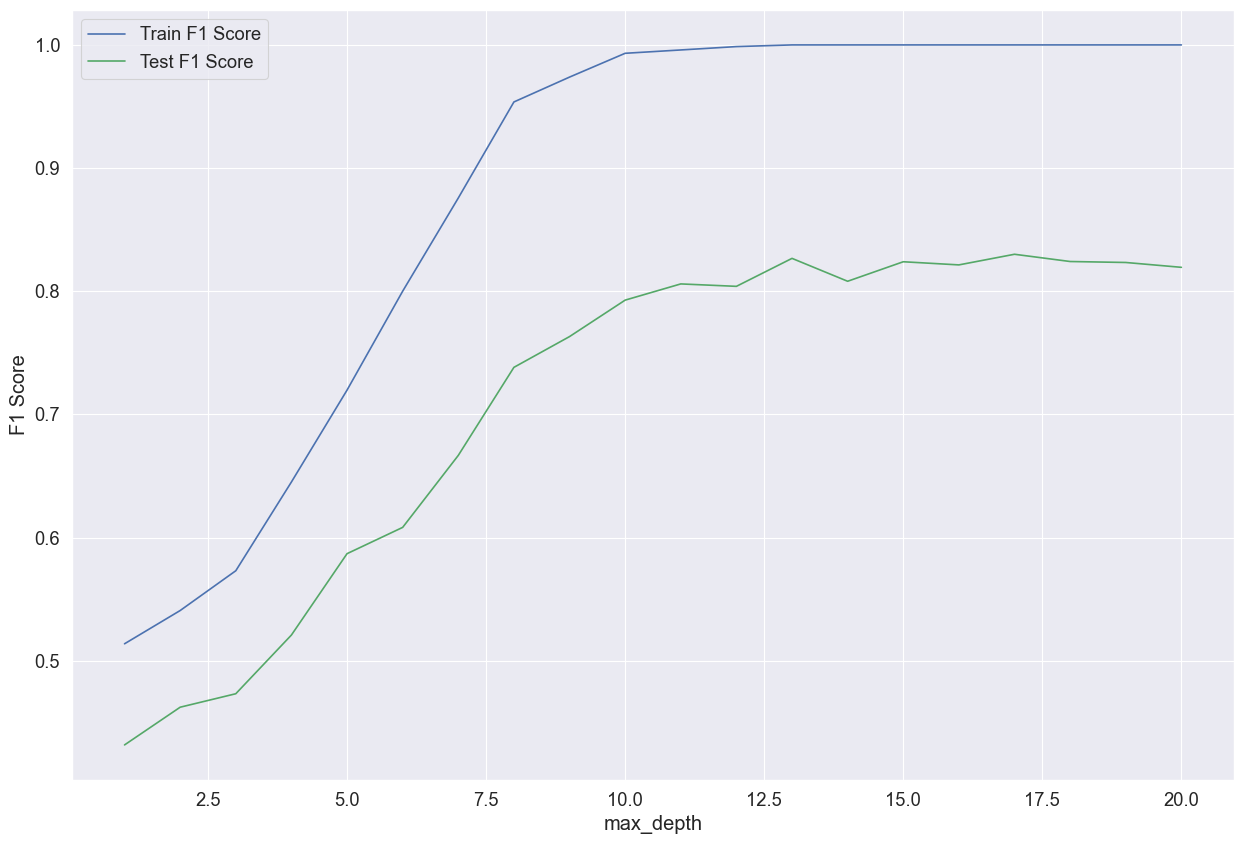

In [79]:
max_depth = np.arange(1,21,1)
trainf1 = []
testf1 = []

for i in max_depth:
    rf = RandomForestClassifier(n_estimators = bestntree, max_depth=i, random_state=42,class_weight = "balanced")
    rf.fit(X_train_rf_tuned, y_train_rf_tuned)
    
    train_pred = rf.predict(X_train_rf_tuned)
    
    f1train = f1_score(y_train_rf_tuned, train_pred)
    trainf1.append(f1train)
    
    y_pred = rf.predict(X_test_rf_tuned)
    
    f1test = f1_score(y_test_rf_tuned, y_pred)
    testf1.append(f1test)

sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
plt.plot(max_depth, trainf1, 'b', label= 'Train F1 Score')
plt.plot(max_depth, testf1, 'g', label= 'Test F1 Score')

plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('max_depth')
plt.show()

In [80]:
c = list(zip(max_depth, testf1))
d = pd.DataFrame( data = c , columns = ('NDepth','Accuracy'))
bestndepth = int(d.iloc[ d['Accuracy'].idxmax(axis = 0) , 0])
print('Optimum Max Depth: ' , bestndepth) 

Optimum Max Depth:  17


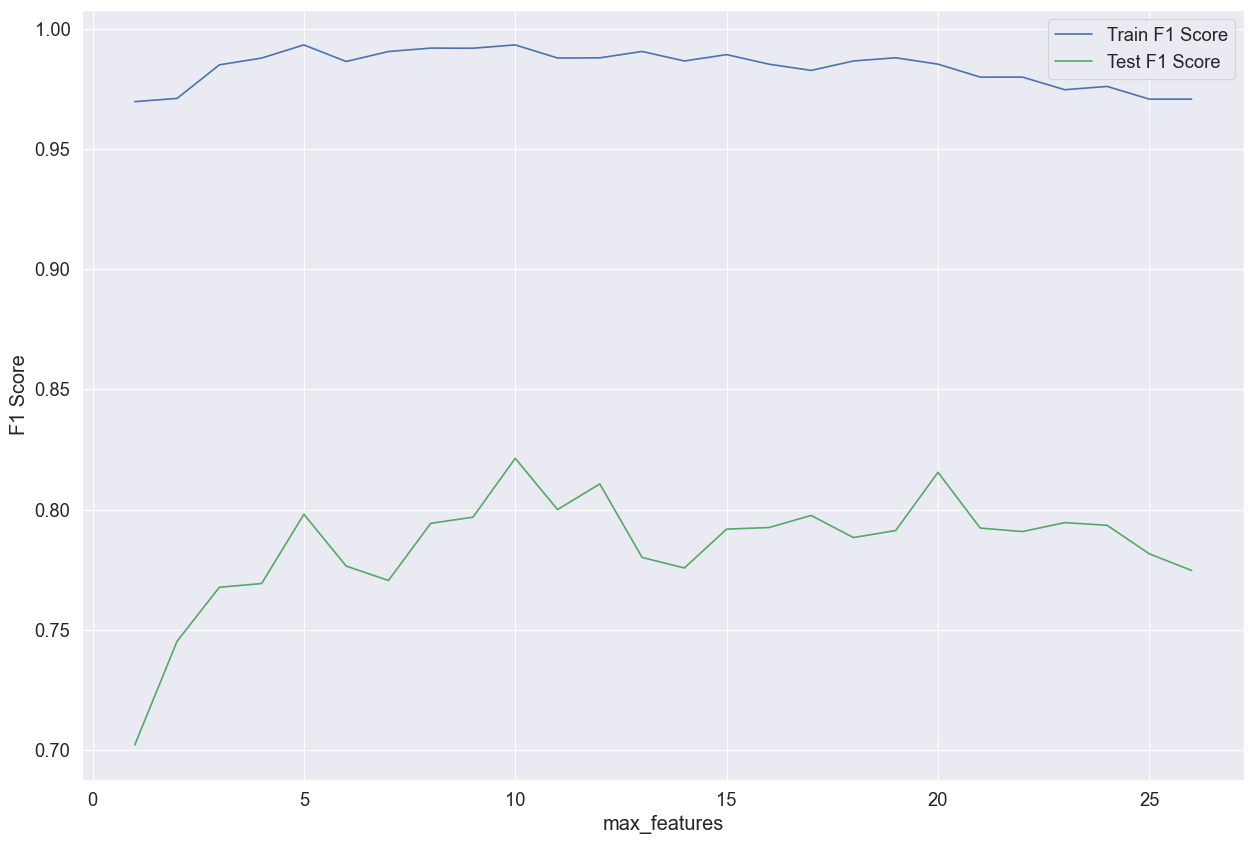

In [81]:
max_features = list(range(1,X_train_rf_tuned.shape[1]))
trainf1 = []
testf1 = []
for i in max_features:
    rftuned = RandomForestClassifier(n_estimators = 50, max_depth=10, max_features=i, random_state=42,class_weight = "balanced")
    rftuned.fit(X_train_rf_tuned, y_train_rf_tuned)
    
    train_pred = rftuned.predict(X_train_rf_tuned)
    
    f1train = f1_score(y_train_rf_tuned, train_pred)
    trainf1.append(f1train)
    
    y_pred_tuned = rftuned.predict(X_test_rf_tuned)
    
    f1test = f1_score(y_test_rf_tuned, y_pred_tuned)
    testf1.append(f1test)
    #print(i)
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(15,10))
plt.plot(max_features, trainf1, 'b', label= 'Train F1 Score')
plt.plot(max_features, testf1, 'g', label= 'Test F1 Score')

plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('max_features')
plt.show()

On peut voir sur ce graphique qu'en changeant nous même les hyperparamètres, le sur-apprentissage semble corrigé.
Nous avons changé le n_estimators et le max_depth avec des valeurs arbitraires.

In [82]:
e = list(zip(max_features, testf1))
f = pd.DataFrame( data = e , columns = ('NFeat','Accuracy'))
bestnfeat = int(f.iloc[ f['Accuracy'].idxmax(axis = 0) , 0])
print('Optimum Max Feature: ' , bestnfeat)

Optimum Max Feature:  10


In [83]:
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.30, random_state=42)

rftuned = RandomForestClassifier(n_estimators = bestntree, max_depth = bestndepth , max_features = bestnfeat, random_state=42, class_weight="balanced")
rftuned.fit(X_train, y_train)
y_pred = rftuned.predict(X_test)

In [84]:
rftunedaccuracy2 = metrics.accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
rftunedroc_auc2 = metrics.auc(fpr, tpr)

rftunedf1_score2 = metrics.f1_score(y_test, y_pred)

rftunedrecall2 = metrics.recall_score(y_test, y_pred)

print('Model Accuracy after tuning: ', rftunedaccuracy2)
print('ROC_AUC Score: ', rftunedroc_auc2)
print('F1 Score: ', rftunedf1_score2)
print('Recall: ', rftunedrecall2)

Model Accuracy after tuning:  0.9705215419501134
ROC_AUC Score:  0.9179824939634357
F1 Score:  0.8997429305912596
Recall:  0.8413461538461539


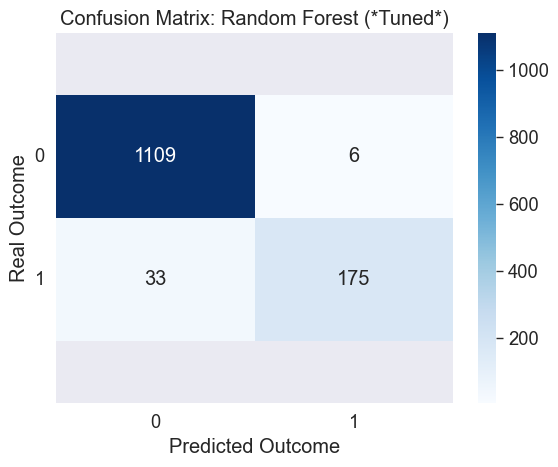

In [85]:
sns.set(context="paper", font_scale=1.5)

rftcm = confusion_matrix(y_test,y_pred)

ax = heatmap = sns.heatmap(rftcm, cmap="Blues", annot= True,fmt=".0f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Random Forest (*Tuned*)')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
rftunedtime2 = (timer() - rftunedstart2)

Nous avons donc corrigé le sur-apprentissage à l'aide de valeurs arbitraires, et nous voyons que le résultat semble toujours
correcte et un des meilleurs.

<h4> modèle SVM

In [86]:
from sklearn.svm import SVC
X = Employee.drop('Attrition', axis =1)
y = Employee['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svmstart = timer()
svm = SVC(random_state=42, class_weight = 'balanced')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svmaccuracy = metrics.accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
svmroc_auc = metrics.auc(fpr, tpr)

svmf1_score = metrics.f1_score(y_test, y_pred)

svmrecall = metrics.recall_score(y_test, y_pred)

print('Model Accuracy: ', svmaccuracy)
print('ROC_AUC Score: ', svmroc_auc)
print('F1 Score: ', svmf1_score)
print('Recall: ', svmrecall)

Model Accuracy:  0.8956916099773242
ROC_AUC Score:  0.8716324594687824
F1 Score:  0.7160493827160493
Recall:  0.8365384615384616


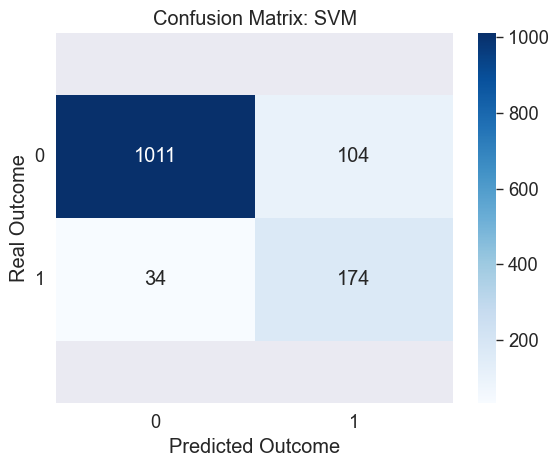

In [87]:
sns.set(context="paper", font_scale=1.5)

svmcm = confusion_matrix(y_test,y_pred)

ax = heatmap = sns.heatmap(svmcm, cmap="Blues", annot= True,fmt=".0f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Confusion Matrix: SVM')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
svmtime = (timer() - svmstart)

Ce modèle ne se démarque pas spécialement des autres.

Nous allons comparer les différents algorithmes pour voir lequel serait le plus utilisable.

In [88]:
LogReg = ( lraccuracy, lrroc_auc , lrf1_score , lrrecall )
LogRegT = ( lrtunedaccuracy, lrtunedroc_auc , lrtunedf1_score , lrtunedrecall )
RF = ( rfaccuracy , rfroc_auc , rff1_score , rfrecall )
RFT = ( rftunedaccuracy , rftunedroc_auc , rftunedf1_score , rftunedrecall)
SVC = ( svmaccuracy , svmroc_auc , svmf1_score , svmrecall )
#SVCT = ( svmtaccuracy , svmtroc_auc , svmtf1_score , svmtrecall )
DTmet = ( DTAccuracy, DTRoc_Auc , DTF1Score , DTRecall )
#RFTSA pour RFT sur-apprentissage supprimé.
RFTSA = (rftunedaccuracy2 , rftunedroc_auc2 , rftunedf1_score2 , rftunedrecall2)

In [89]:
modelsummary = pd.DataFrame(data = (LogReg, RF, DTmet,LogRegT,RFT,SVC,RFTSA), 
                         columns = ('Accuracy', 'ROC_AUC Score', 'F1 Score','Recall Score')).mul(100).round(1).astype(str).add('%')

modelsummary.rename(index={0 : 'Logistic Regression (*Baseline*)' , 
                        1 : 'Random Forest Normal' , 
                        2 : 'Decision Tree' ,
                        3 : 'Logistic Regression (*Tuned*)',
                        4 : 'Random Forest (*Tuned*)' ,
                        5 : 'Support Vector Machine (*Baseline*)', 
                        6 : 'Random Forest (*Tuned*) sur-apprentissage supprimé'} , 
                        #5 : 'Support Vector Machine (*Tuned*)' },
                 inplace = True)
#dtctimer
#RFCtimer
#LRtimer
modelsummary['Run Time'] = (LRtimer, rftime, dtctimer,lrtunedtime,rftunedtime,svmtime,rftunedtime2)

In [90]:
modelsummary

,Accuracy,ROC_AUC Score,F1 Score,Recall Score,Run Time
Logistic Regression (*Baseline*),85.4%,59.5%,31.8%,21.6%,0.407226
Random Forest Normal,96.7%,93.4%,89.5%,88.5%,2.477698
Decision Tree,92.7%,84.1%,92.5%,71.6%,0.306420
Logistic Regression (*Tuned*),70.1%,70.0%,42.3%,69.7%,0.305283
Random Forest (*Tuned*),97.8%,94.4%,92.8%,89.4%,52.409850
Support Vector Machine (*Baseline*),89.6%,87.2%,71.6%,83.7%,1.149400
Random Forest (*Tuned*) sur-apprentissage supprimé,97.1%,91.8%,90.0%,84.1%,24.100284


Suite aux résultats que l'on voit dans la comparaison ci-dessus, nous recommandons fortement de se baser sur le modèle du Random Forest.
En prenant les résultats qui ressortent du modèle Random Forest, nous voyons que les 5 caractéristiques principales sont :
<li>MeanWorkingHours: Les employés qui travaillent beaucoup d'heures par jour ont plus de chance de partir de l'entreprise.
<li>Age : Plus les employés sont jeunes, plus ils ont de chances de vouloir partir de l'entreprise.
<li>TotalWorkingYears: Moins les personnes ont travaillé durant toute leur vie, plus ils voudront partir de l'entreprise.
<li>MonthlyIncome: Plus le salaire est bas, plus ils voudront partir de l'entreprise.
<li>YearsAtCompany: Plus l'employé a travaillé pour une entreprise, moins il voudra la quitter.
    

Finalement, tout ces résultats peuvent être mis en parallèle afin de faire drastiquement tomber les chances qu'un employé démissionne.

Par exemple, si les jeunes employés ont un meilleur salaire, ils voudront rester plus longtemps dans l'entreprise.
Et si ils restent dans l'entreprise, ils auront plus d'augmentations de salaire, donc ils auront encore plus envie de rester dans l'entreprise, ce qui créer un cercle qui permet de garder les employés.
    
Ensuite, si l'environnement global de l'entreprise est sain et ne met pas la pression à l'employé, par exemple sur le nombre d'heures à faire ou la charge de travail, l'employé (comme on a pu le voir dans les résultats) aura moins de chances de partir de l'entreprise.

Si l'on améliore une caractéristique importante, de notre étude, nous voyons que cela entraîne l'amélioration des autres statistiques donc que les chances de démissions globales déscendent aussi.
    

Finalement, nous recommandons donc aux RH de :
    <li>Augmenter les salaires des jeunes employés 
    <li>Ne pas mettre trop de pression sur les employés quant à la charge de travail, pour baisser le nombre d'heure de travail      journalier
    <li> Créer un environnement sain dans l'entreprise.
        
 
Evidemment, nous nous sommes basés sur les 5 plus grosses caractéristiques qui favorisent la démission des employés.
D'autres seraient interessantes à améliorer, telles que la distance par rapport aux bureaux ( donc déménager les bureaux vers un endroit idéal pour éviter trop de distance à la majorité des employés, ou recruter des employés plus proches, ou même autoriser le télétravail). 
Egalement la satisfaction au travail, plus elle est haute plus ils resteront, donc optimiser chaque composante de cette caractéristique permettrait de garder les employés.
        
Tout peut être un axe d'amélioration, mais nous avons cité les 5 points sur lesquels se focaliser pour réduire un maximum les démissions et les départs.
        